# **Install the necessary libraries**

In [1]:
!pip install numpy pandas scikit-learn seaborn


In [2]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer,mean_absolute_error,mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns

# **1.) Call the Data and describe it using Pandas**




In [3]:
data = pd.read_excel("data.xlsx")
data.head()

e/D  p/e  Angle (α)  Intensity         Re          Nu         F     η thp
0  0.036   10         45       1200  17884.908  144.132952  0.018926  1.806033
1  0.036   10         45       1200  14545.710  112.031787  0.019650  1.675865
2  0.036   10         45       1200  11429.043   83.764814  0.021900  1.500471
3  0.036   10         45       1200   7195.789   50.101900  0.024621  1.274513
4  0.036   10         45       1200   5072.673   33.381400  0.026850  1.105540

In [4]:
data.describe()

e/D         p/e   Angle (α)    Intensity            Re  \
count  486.000000  486.000000  486.000000   486.000000    486.000000   
mean     0.028667   15.000000   60.000000  1000.000000  10021.747506   
std      0.006135    4.086689   12.260068   163.467579   5157.295757   
min      0.021000   10.000000   45.000000   800.000000   3542.924000   
25%      0.021000   10.000000   45.000000   800.000000   5112.555750   
50%      0.029000   15.000000   60.000000  1000.000000   9387.396500   
75%      0.036000   20.000000   75.000000  1200.000000  14586.484000   
max      0.036000   20.000000   75.000000  1200.000000  18484.788000   

               Nu           F       η thp  
count  486.000000  486.000000  486.000000  
mean    61.986952    0.021092    1.199258  
std     37.032878    0.003108    0.258742  
min     15.308278    0.016500    0.737783  
25%     27.606103    0.018450    0.974755  
50%     53.012300    0.020550    1.162494  
75%     92.928212    0.023400    1.408320  
max    150.593394    0.028350    1.854129

array([[<Axes: title={'center': 'e/D'}>, <Axes: title={'center': 'p/e'}>,
        <Axes: title={'center': 'Angle (α)'}>],
       [<Axes: title={'center': 'Intensity'}>,
        <Axes: title={'center': 'Re'}>, <Axes: title={'center': 'Nu'}>],
       [<Axes: title={'center': 'F'}>, <Axes: title={'center': 'η thp'}>,
        <Axes: >]], dtype=object)

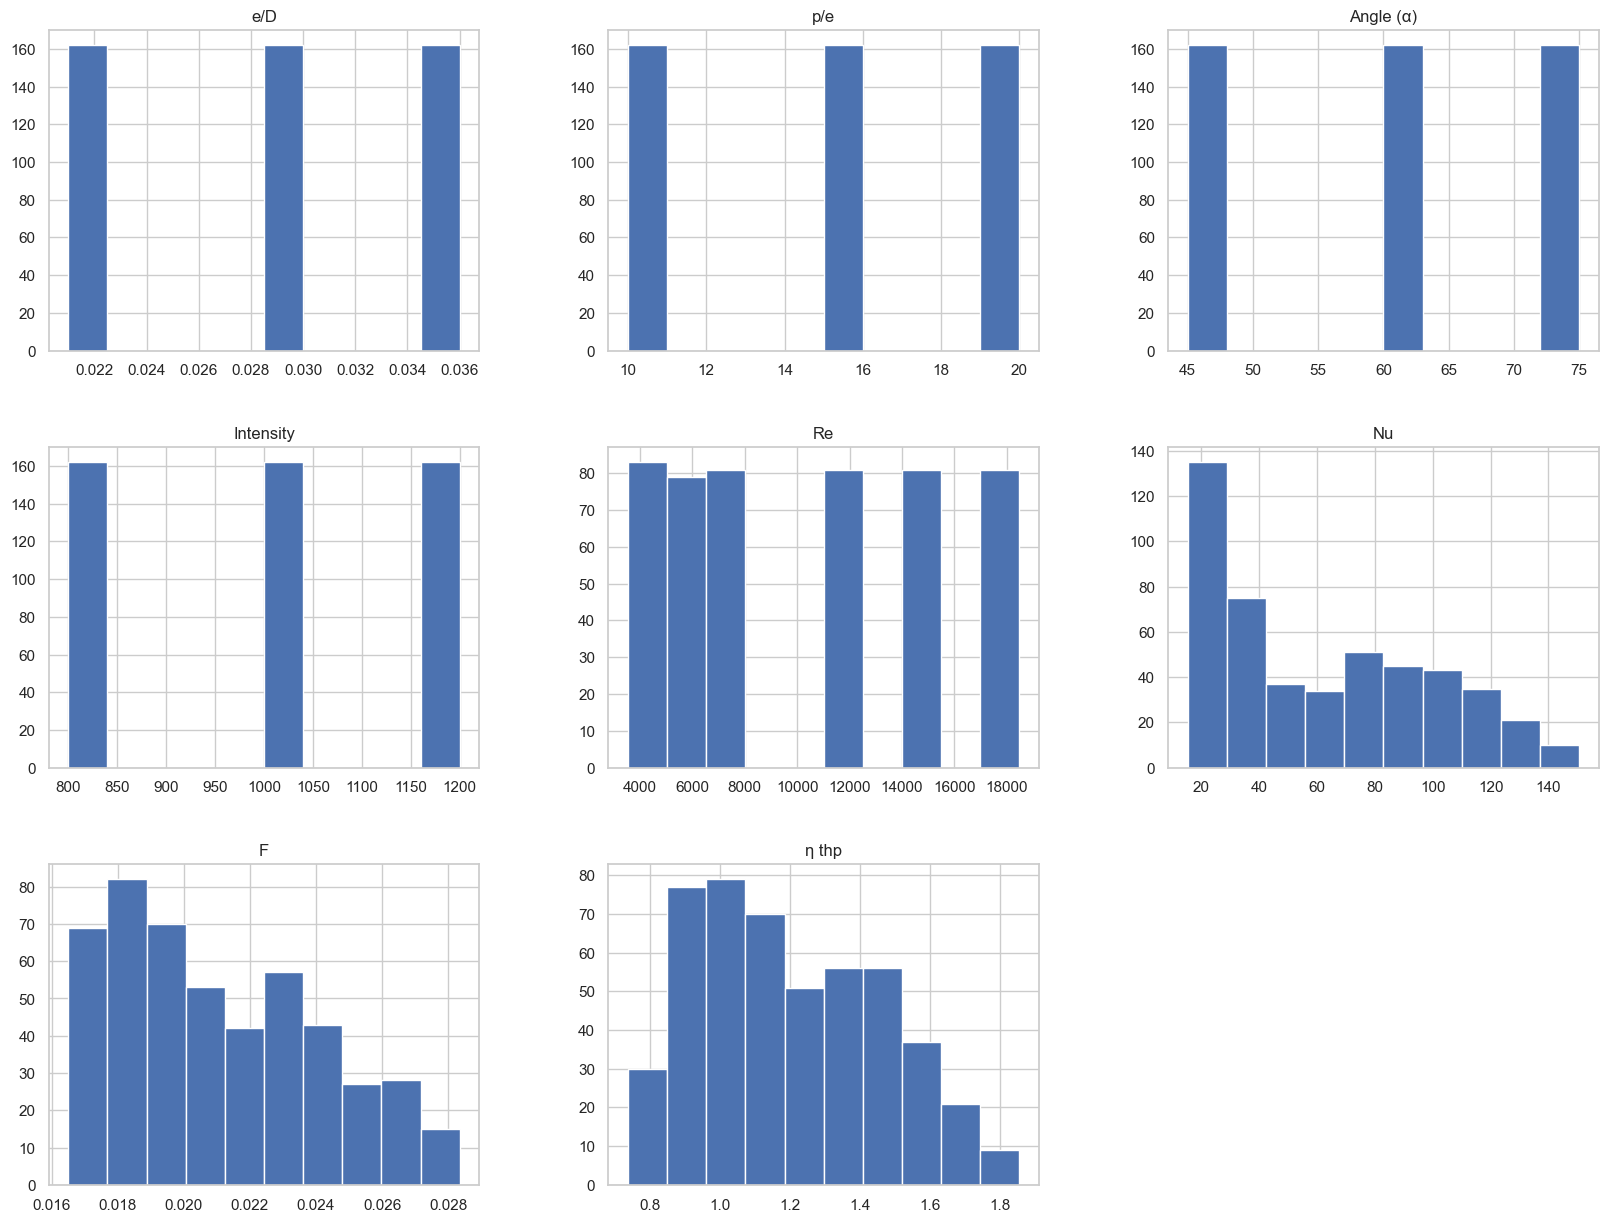

In [5]:
sns.set(style="whitegrid")
data.hist(bins=10, figsize=(20,15))

In [6]:
# Now we will be using DataFrame by Pandas to easily access our data in the form of rows and columns, well labelled structure
df = pd.DataFrame(data)
df

e/D  p/e  Angle (α)  Intensity         Re          Nu         F  \
0    0.036   10         45       1200  17884.908  144.132952  0.018926   
1    0.036   10         45       1200  14545.710  112.031787  0.019650   
2    0.036   10         45       1200  11429.043   83.764814  0.021900   
3    0.036   10         45       1200   7195.789   50.101900  0.024621   
4    0.036   10         45       1200   5072.673   33.381400  0.026850   
..     ...  ...        ...        ...        ...         ...       ...   
481  0.021   20         75        800  14546.612   72.917804  0.016800   
482  0.021   20         75        800  11464.390   53.224542  0.017100   
483  0.021   20         75        800   7219.529   30.841090  0.019200   
484  0.021   20         75        800   5092.939   20.936222  0.020850   
485  0.021   20         75        800   3599.090   15.308278  0.022350   

        η thp  
0    1.806033  
1    1.675865  
2    1.500471  
3    1.274513  
4    1.105540  
..        ...  
481  1.123549  
482  1.009375  
483  0.836190  
484  0.737783  
485  0.762146  

[486 rows x 8 columns]

In [7]:
print(df.index)

RangeIndex(start=0, stop=486, step=1)


# 2.) Prediction of Nu (dependent variable)

a) Define X and Y on the basis of independent and dependent variables

In [8]:
X = df[['e/D','p/e','Angle (α)','Intensity','Re']]
Y = df['Nu']

scaler = StandardScaler()

# 3) Applying Linear Regression Model

It is  a fundamental statistical method used to model the relationship between a dependent variable (often denoted as y) and one or more independent variables (often denoted as x).

a) Split our Data - X and Y - into Training Data and Testing Data

In [9]:
#Splitting our Data
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=42)
# here test size 0.3 refers to 30% data which has been kept as testing data
print("No. of Training Data: ", len(x_train1))
print("No. of Testing Data: ", len(x_test1))

x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)
#Apply Linear Regression
model1 = LinearRegression()

model1.fit(x_train1, y_train1)

y_pred_train1 = model1.predict(x_train1)  #For Training Data
y_pred_test1 = model1.predict(x_test1)   #For Testing Data

No. of Training Data:  340
No. of Testing Data:  146


b) Plotting the Graph between Predicted and Actual Values of Nu for the training data and testing data

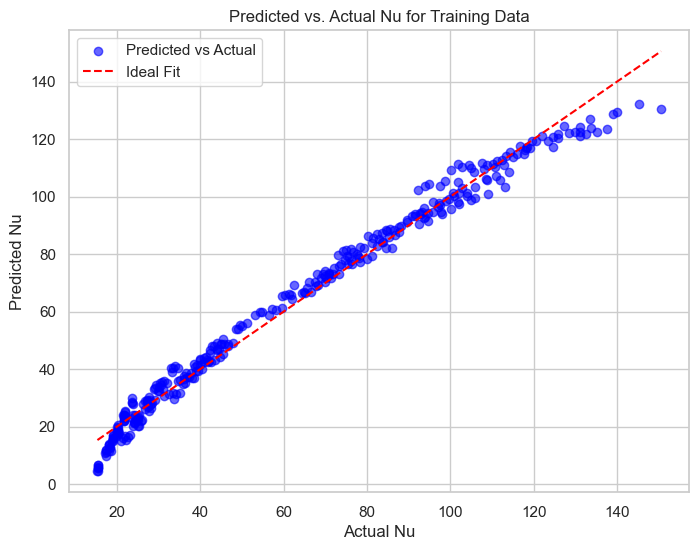

In [10]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.scatter(y_train1, y_pred_train1, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], color="red", linestyle="--", label="Ideal Fit")  # Line of perfect prediction
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Training Data")
plt.legend()
plt.show()

In [11]:
comparison_df = pd.DataFrame({
    "Actual_Y_Train1": y_train1,
    "Predicted_Y_Train1": y_pred_train1
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Train1  Predicted_Y_Train1
3          50.101900           54.957782
204       118.178490          116.836882
172        26.606699           28.904466
60        137.544131          123.656013
110        85.253151           85.896024
311        21.661369           21.926107
375        33.663313           29.486555
29         22.031060           23.532587
173        19.970307           18.607375
381        42.597076           42.334608
26         76.072492           77.528393
7         104.006905          101.345692
442        25.140864           22.421542
108       145.353358          132.146879
37        108.590343          106.059124
157        93.746949           96.019886
453        39.316070           41.296616
118        31.193123           35.999728
114       133.541113          126.927123
175        85.632407           88.771771
374        56.422711           58.798778
144       140.123787          129.429167
360       112.315539          112.676352
370        25.26

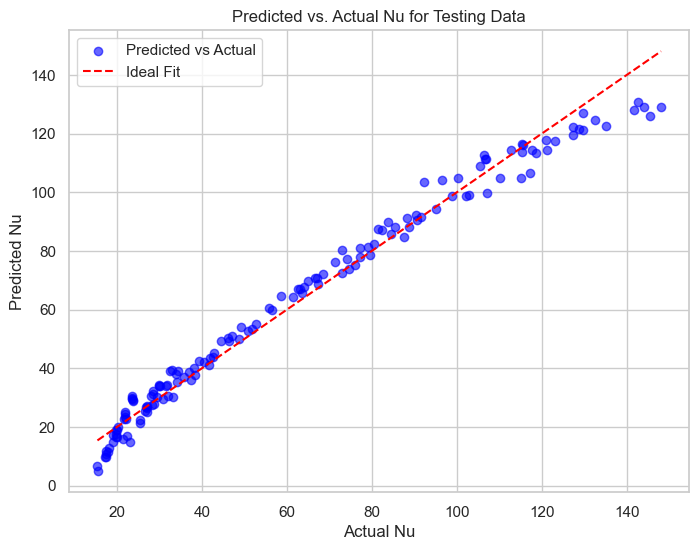

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, y_pred_test1, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()],  color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Testing Data")
plt.legend()
plt.show()

In [13]:
comparison_df = pd.DataFrame({
    "Actual_Y_Test1": y_test1,
    "Predicted_Y_Test1": y_pred_test1
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Test1  Predicted_Y_Test1
420      105.534450         108.913861
262       27.064720          27.211959
431       15.478502           4.860812
448       22.331492          16.981481
364       27.127369          25.013581
465       31.876347          30.622026
193       83.719970          89.711945
225       42.585168          43.891290
104       73.005740          72.582985
229       90.682188          90.599793
9         46.029486          50.280066
176       64.031275          67.772044
480       92.188044         103.435722
325       91.660257          91.578069
391       80.398271          82.401396
429       33.076495          30.210192
84       127.274372         119.619769
30       121.059337         117.826992
333       35.776031          36.939333
90       145.516574         126.103849
249       38.430523          37.810552
305       18.060968          12.816378
101       22.165827          22.825330
481       72.917804          80.312254
33        41.762716      

# Evaluating Our Linear Regression Model

Here we are usng different parameters such as Mean Absolute Error, Root Mean Square Error, Relative Absolute Error, Relative Root Mean Square Error, R2 Score

For, further evaluation we are also using Cross Validation Score (scikit learn).

In [14]:
# For Training Data
def relative_absolute_error(true, pred):
    true_mean = np.mean(true)
    squared_error_num = np.sum(np.abs(true - pred))
    squared_error_den = np.sum(np.abs(true - true_mean))
    rae_loss = squared_error_num / squared_error_den
    return rae_loss

def root_relative_squared_error(true, pred):
    true_mean = np.mean(true)
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(true - true_mean))
    squared_error = num/den
    rrse_loss = np.sqrt(squared_error)
    return rrse_loss
r2_train1 = r2_score(y_train1,y_pred_train1)
mae_train1 = mean_absolute_error(y_train1, y_pred_train1)
rmse_train1 = np.sqrt(mean_squared_error(y_train1,y_pred_train1))
rae_train1 = relative_absolute_error(y_train1,y_pred_train1)
rrse_train1 = root_relative_squared_error(y_train1,y_pred_train1)
cc_train1 = pearsonr(y_train1,y_pred_train1)
print("For Training Data\n")
print(f'Mean Absolute Error (MAE): {mae_train1:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_train1:.4f}')
print(f'Relative Absolute Error (RAE): {rae_train1}')
print(f'RRSE : {rrse_train1}')
print(f'R2 Score: {r2_train1:.4f}')
print("CC", cc_train1)

print("\n")
scores = cross_val_score(model1, x_train1, y_train1, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Training Data

Mean Absolute Error (MAE): 3.3845
Root Mean Square Error (RMSE): 4.4006
Relative Absolute Error (RAE): 0.10474627808239059
RRSE : 0.12115930180439022
R2 Score: 0.9853
CC PearsonRResult(statistic=0.9926330760085886, pvalue=6.5303772546e-312)


Scores:  [5.12675141 4.58639246 3.89156403 3.9308165  4.62631879 2.80027031
 4.12935247 4.62047277 5.03892094 5.66478876]
Mean:  4.441564844194315
Standard deviation:  0.7592363179171954


In [15]:
mae_test1 = mean_absolute_error(y_test1, y_pred_test1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1,y_pred_test1))
rae_test1 = relative_absolute_error(y_test1,y_pred_test1)
rrse_test1 = root_relative_squared_error(y_test1,y_pred_test1)
r2_test1 = r2_score(y_test1,y_pred_test1)
cc_test1 = pearsonr(y_test1,y_pred_test1)
print("For Testing Data\n")
print(f'Mean Absolute Error (MAE): {mae_test1:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_test1:.4f}')
print(f'Relative Absolute Error (RAE): {rae_test1}')
print(f'RRSE : {rrse_test1}')
print(f'R2 Score: {r2_test1:.4f}')
print("CC", cc_test1)
print("\n")
scores = cross_val_score(model1, x_test1, y_test1, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Testing Data

Mean Absolute Error (MAE): 4.0897
Root Mean Square Error (RMSE): 5.3464
Relative Absolute Error (RAE): 0.1214475106087127
RRSE : 0.13880986623785097
R2 Score: 0.9807
CC PearsonRResult(statistic=0.9907650160605983, pvalue=7.359035550971489e-127)


Scores:  [6.07648317 5.87685461 7.41671953 4.24828486 5.4516994  4.85147921
 4.19132432 5.14528353 4.96349367 5.97849108]
Mean:  5.42001133632254
Standard deviation:  0.918103242920434


# Plotting a graph between Relative Error vs Dataset Number for Training and Testing data

Text(0, 0.5, 'Relative Error')

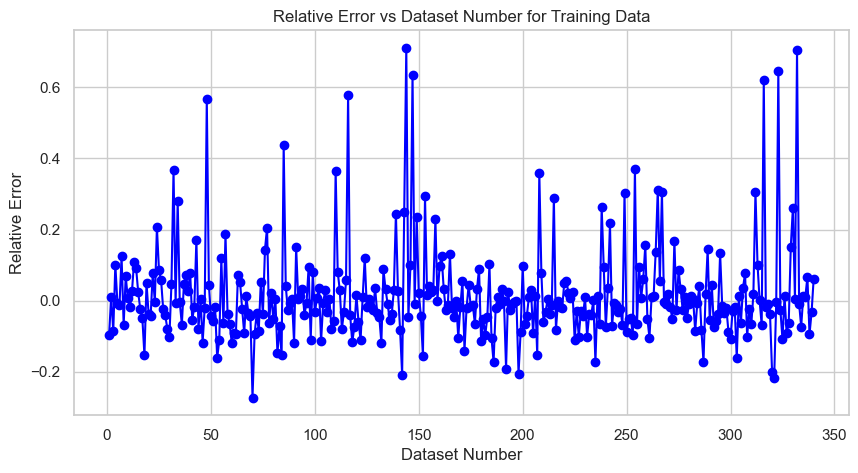

In [16]:
# Calculate relative error for each dataset
relative_errors_train1 = np.array((y_train1 - y_pred_train1) / y_train1)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_train1) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_train1, marker='o', linestyle='-', color="blue")

# Add title and labels
plt.title('Relative Error vs Dataset Number for Training Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [17]:
error_df = pd.DataFrame({
    "Relative_Error_Train1" : relative_errors_train1
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Train1
0                -0.096920
1                 0.011352
2                -0.086360
3                 0.100972
4                -0.007541
5                -0.012222
6                 0.124074
7                -0.068155
8                 0.068248
9                 0.006162
10               -0.019138
11                0.025587
12                0.108163
13                0.090858
14                0.023310
15               -0.024245
16               -0.050375
17               -0.154092
18                0.049528
19               -0.036661
20               -0.042112
21                0.076323
22               -0.003212
23                0.206762
24                0.085178
25                0.058958
26               -0.022748
27               -0.040840
28               -0.078725
29               -0.103756
30                0.046317
31                0.366787
32               -0.007743
33                0.279826
34               -0.004937
35               -0.067404
3

Text(0, 0.5, 'Relative Error')

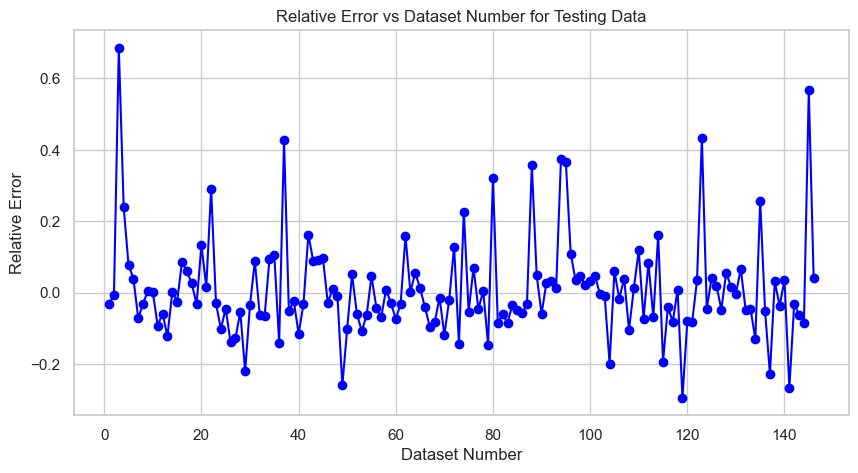

In [18]:
# Calculate relative error for each dataset
relative_errors_test1 = np.array((y_test1 - y_pred_test1) / y_test1)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_test1) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_test1, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Testing Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [19]:
error_df = pd.DataFrame({
    "Relative_Error_Test1" : relative_errors_test1
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Test1
0               -0.032022
1               -0.005440
2                0.685964
3                0.239573
4                0.077921
5                0.039350
6               -0.071572
7               -0.030671
8                0.005791
9                0.000909
10              -0.092345
11              -0.058421
12              -0.122008
13               0.000897
14              -0.024915
15               0.086657
16               0.060143
17               0.026701
18              -0.032516
19               0.133406
20               0.016132
21               0.290383
22              -0.029753
23              -0.101408
24              -0.044689
25              -0.139589
26              -0.128246
27              -0.053207
28              -0.220337
29              -0.033790
30               0.088099
31              -0.061994
32              -0.066300
33               0.093400
34               0.105277
35              -0.140861
36               0.427371
37          

# 4.) Applying Decision Trees Regressor


a) Split the data of X and Y into training and testing data.

In [20]:
#Decision Trees Regressor

# Split dataset into training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

model2 = DecisionTreeRegressor(
    min_samples_leaf=5
)

# Train the model
model2.fit(x_train2, y_train2)

# Predict on the test set
y_pred_train2 = model2.predict(x_train2)
y_pred_test2 = model2.predict(x_test2)


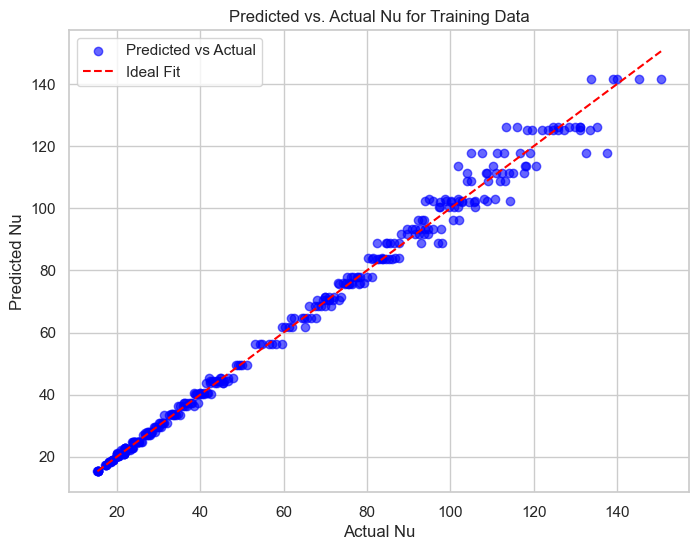

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train2, y_pred_train2, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()], color="red", linestyle="--", label="Ideal Fit")  # Line of perfect prediction
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Training Data")
plt.legend()
plt.show()

In [22]:
comparison_df = pd.DataFrame({
    "Actual_Y_Train2": y_train2,
    "Predicted_Y_Train2": y_pred_train2
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Train2  Predicted_Y_Train2
3          50.101900           49.657324
204       118.178490          113.756383
172        26.606699           27.132892
60        137.544131          117.792728
110        85.253151           83.726994
311        21.661369           21.270048
375        33.663313           33.404658
29         22.031060           22.704315
173        19.970307           21.270048
381        42.597076           40.137583
26         76.072492           77.871997
7         104.006905          108.675764
442        25.140864           24.760025
108       145.353358          141.766178
37        108.590343          111.421743
157        93.746949           96.372546
453        39.316070           40.137583
118        31.193123           30.934856
114       133.541113          125.087582
175        85.632407           88.835500
374        56.422711           56.234324
144       140.123787          141.766178
360       112.315539          111.421743
370        25.26

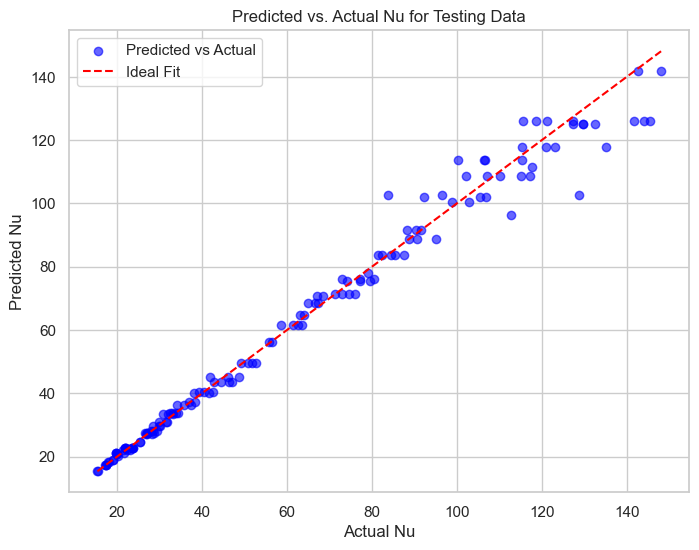

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred_test2, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Testing Data")
plt.legend()
plt.show()

In [24]:
comparison_df = pd.DataFrame({
    "Actual_Y_Test2": y_test2,
    "Predicted_Y_Test2": y_pred_test2
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Test2  Predicted_Y_Test2
420      105.534450         102.129815
262       27.064720          27.132892
431       15.478502          15.442445
448       22.331492          22.056420
364       27.127369          27.550644
465       31.876347          33.404658
193       83.719970         102.514345
225       42.585168          40.419503
104       73.005740          71.291832
229       90.682188          88.835500
9         46.029486          45.246931
176       64.031275          64.756402
480       92.188044         102.129815
325       91.660257          91.681131
391       80.398271          76.043777
429       33.076495          33.404658
84       127.274372         125.087582
30       121.059337         117.792728
333       35.776031          36.265487
90       145.516574         126.195900
249       38.430523          37.298561
305       18.060968          18.198789
101       22.165827          22.704315
481       72.917804          76.043777
33        41.762716      

In [25]:
mae_train2 = mean_absolute_error(y_train2, y_pred_train2)
rmse_train2 = np.sqrt(mean_squared_error(y_train2,y_pred_train2))
rae_train2 = relative_absolute_error(y_train2,y_pred_train2)
rrse_train2 = root_relative_squared_error(y_train2,y_pred_train2)
r2_train2 = r2_score(y_train2,y_pred_train2)
cc_train2 = pearsonr(y_train2,y_pred_train2)
print("For Training Data\n")
print(f'Mean Absolute Error (MAE): {mae_train2:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_train2:.4f}')
print(f'Relative Absolute Error (RAE): {rae_train2}')
print(f'RRSE : {rrse_train2}')
print(f'R2 Score: {r2_train2:.4f}')
print("CC", cc_train2)

print("\n")
scores = cross_val_score(model2, x_train2, y_train2, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Training Data

Mean Absolute Error (MAE): 1.9471
Root Mean Square Error (RMSE): 3.2435
Relative Absolute Error (RAE): 0.06026110446778114
RRSE : 0.08929982123256988
R2 Score: 0.9920
CC PearsonRResult(statistic=0.9960047901128946, pvalue=0.0)


Scores:  [6.98202295 4.85462523 3.36671381 4.76526862 3.65747046 4.3197903
 4.26956703 4.64076782 5.32210545 5.56762287]
Mean:  4.774595454236599
Standard deviation:  0.9755920187598347


In [26]:
mae_test2 = mean_absolute_error(y_test2, y_pred_test2)
rmse_test2 = np.sqrt(mean_squared_error(y_test2,y_pred_test2))
rae_test2 = relative_absolute_error(y_test2,y_pred_test2)
rrse_test2 = root_relative_squared_error(y_test2,y_pred_test2)
r2_test2 = r2_score(y_test2,y_pred_test2)
cc_test2 = pearsonr(y_test2,y_pred_test2)
print("For Testing Data\n")
print(f'Mean Absolute Error (MAE): {mae_test2:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_test2:.4f}')
print(f'Relative Absolute Error (RAE): {rae_test2}')
print(f'RRSE : {rrse_test2}')
print(f'R2 Score: {r2_test2:.4f}')
print("CC", cc_test2)
print("\n")
scores = cross_val_score(model2, x_test2, y_test2, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Testing Data

Mean Absolute Error (MAE): 2.8992
Root Mean Square Error (RMSE): 5.1939
Relative Absolute Error (RAE): 0.08609429493406259
RRSE : 0.13485152711699758
R2 Score: 0.9818
CC PearsonRResult(statistic=0.9913399209861221, pvalue=7.34129038968373e-129)


Scores:  [ 6.96168331  6.54356782  8.48252069  8.95610767  6.6787574   6.69114801
  9.66958271 10.80310053  8.91838708  3.3139419 ]
Mean:  7.701879712251163
Standard deviation:  2.009072849980357


Text(0, 0.5, 'Relative Error')

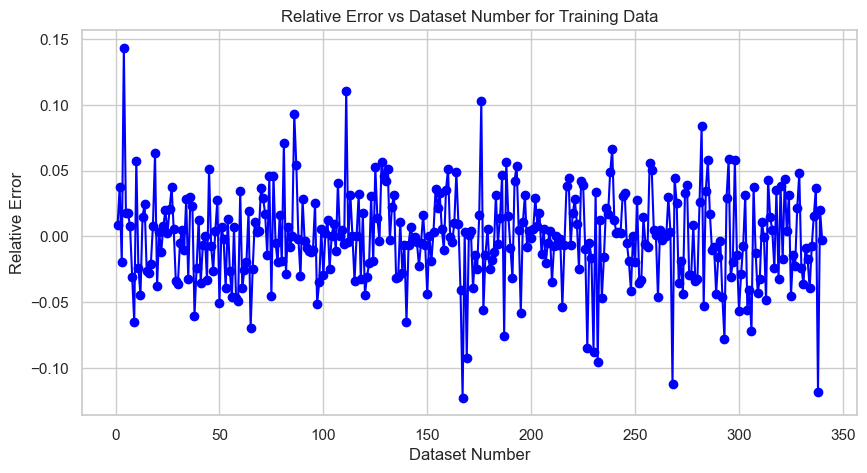

In [27]:
relative_errors_train2 = np.array((y_train2 - y_pred_train2) / y_train2)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_train2) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_train2, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Training Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [28]:
error_df = pd.DataFrame({
    "Relative_Error_Train2" : relative_errors_train2
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Train2
0                 0.008873
1                 0.037419
2                -0.019777
3                 0.143600
4                 0.017901
5                 0.018065
6                 0.007684
7                -0.030559
8                -0.065084
9                 0.057739
10               -0.023655
11               -0.044890
12                0.015148
13                0.024679
14               -0.026074
15               -0.028007
16               -0.020895
17                0.008280
18                0.063303
19               -0.037405
20                0.003339
21               -0.011721
22                0.007958
23                0.019830
24                0.002386
25                0.020820
26                0.037375
27                0.005470
28               -0.033529
29               -0.036384
30               -0.004750
31                0.004920
32               -0.009933
33                0.028201
34               -0.032637
35                0.029804
3

Text(0, 0.5, 'Relative Error')

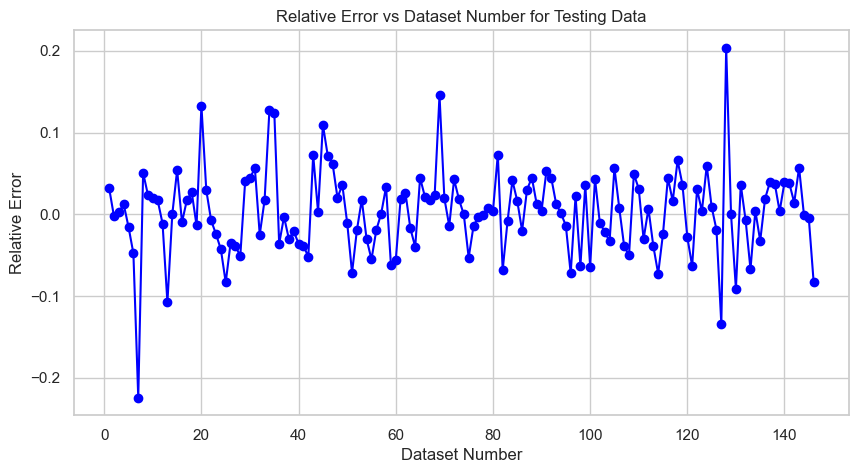

In [29]:
relative_errors_test2 = np.array((y_test2 - y_pred_test2) / y_test2)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_test2) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_test2, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Testing Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [30]:
error_df = pd.DataFrame({
    "Relative_Error_Test2" : relative_errors_test2
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Test2
0                0.032261
1               -0.002519
2                0.002329
3                0.012318
4               -0.015603
5               -0.047945
6               -0.224491
7                0.050855
8                0.023476
9                0.020364
10               0.017001
11              -0.011325
12              -0.107842
13              -0.000228
14               0.054162
15              -0.009921
16               0.017182
17               0.026984
18              -0.013681
19               0.132773
20               0.029455
21              -0.007631
22              -0.024294
23              -0.042870
24              -0.083429
25              -0.035239
26              -0.038940
27              -0.051106
28               0.040513
29               0.044414
30               0.056328
31              -0.024976
32               0.017219
33               0.127997
34               0.124448
35              -0.036109
36              -0.003092
37          

# 5.) Random Forest Regression

In [31]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.3, random_state=42)

x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)
model3 = RandomForestRegressor(
    max_features='sqrt',
    random_state=42
)

# Train the model
model3.fit(x_train3, y_train3)

y_pred_train3 = model3.predict(x_train3)
y_pred_test3 = model3.predict(x_test3)

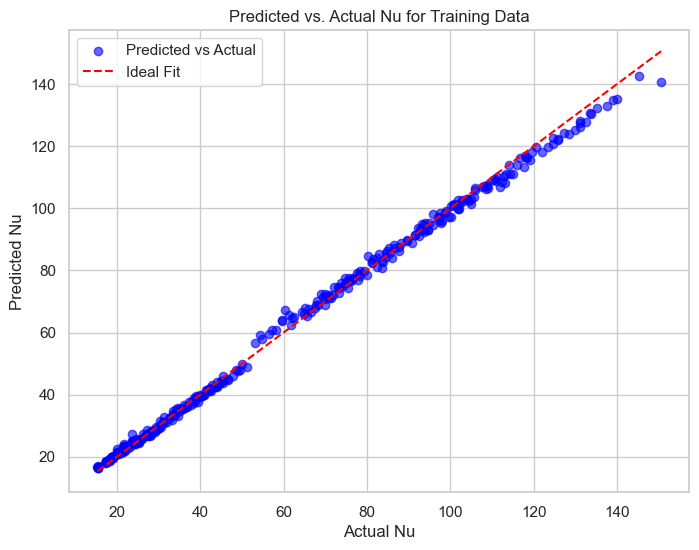

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train3, y_pred_train3, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_train3.min(), y_train3.max()], [y_train3.min(), y_train3.max()], color="red", linestyle="--", label="Ideal Fit")  # Line of perfect prediction
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Training Data")
plt.legend()
plt.show()

In [33]:
comparison_df = pd.DataFrame({
    "Actual_Y_Train3": y_train3,
    "Predicted_Y_Train3": y_pred_train3
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Train3  Predicted_Y_Train3
3          50.101900           49.825856
204       118.178490          116.551839
172        26.606699           26.674016
60        137.544131          133.036245
110        85.253151           87.090501
311        21.661369           24.004720
375        33.663313           33.543209
29         22.031060           23.003384
173        19.970307           21.042640
381        42.597076           41.286497
26         76.072492           76.664708
7         104.006905          103.145861
442        25.140864           24.802884
108       145.353358          142.474751
37        108.590343          106.362659
157        93.746949           94.485468
453        39.316070           39.358568
118        31.193123           30.786351
114       133.541113          130.807626
175        85.632407           85.523768
374        56.422711           59.379025
144       140.123787          135.359974
360       112.315539          108.372986
370        25.26

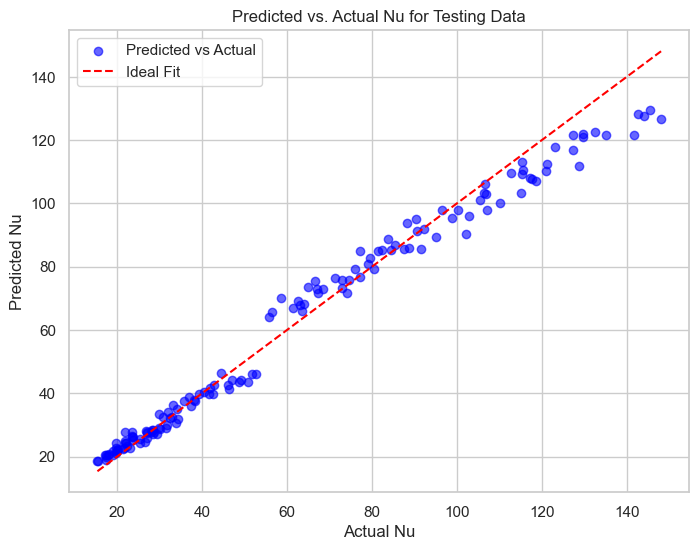

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test3, y_pred_test3, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_test3.min(), y_test3.max()], [y_test3.min(), y_test3.max()],  color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Testing Data")
plt.legend()
plt.show()

In [35]:
comparison_df = pd.DataFrame({
    "Actual_Y_Test3": y_test3,
    "Predicted_Y_Test3": y_pred_test3
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Test3  Predicted_Y_Test3
420      105.534450         101.191256
262       27.064720          27.341793
431       15.478502          18.717095
448       22.331492          23.463618
364       27.127369          27.671466
465       31.876347          33.955059
193       83.719970          88.655892
225       42.585168          39.859102
104       73.005740          73.343523
229       90.682188          91.218761
9         46.029486          42.710025
176       64.031275          68.268566
480       92.188044          91.786232
325       91.660257          85.523888
391       80.398271          79.220592
429       33.076495          36.220165
84       127.274372         116.888944
30       121.059337         110.389374
333       35.776031          37.471728
90       145.516574         129.442105
249       38.430523          37.632566
305       18.060968          20.677768
101       22.165827          24.426602
481       72.917804          75.788034
33        41.762716      

In [36]:
mae_train3 = mean_absolute_error(y_train3, y_pred_train3)
rmse_train3 = np.sqrt(mean_squared_error(y_train3,y_pred_train3))
r2_train3 = r2_score(y_train3,y_pred_train3)
rae_train3 = relative_absolute_error(y_train3,y_pred_train3)
rrse_train3 = root_relative_squared_error(y_train3,y_pred_train3)
cc_train3 = pearsonr(y_train3,y_pred_train3)
print("For Training Data\n")
print(f'Mean Absolute Error (MAE): {mae_train3:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_train3:.4f}')
print(f'Relative Absolute Error (RAE): {rae_train3}')
print(f'RRSE : {rrse_train3}')
print(f'R2 Score: {r2_train3:.4f}')
print("CC", cc_train3)

print("\n")
scores = cross_val_score(model3, x_train3, y_train3, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Training Data

Mean Absolute Error (MAE): 1.3615
Root Mean Square Error (RMSE): 1.8638
Relative Absolute Error (RAE): 0.04213487561726787
RRSE : 0.0513136521755579
R2 Score: 0.9974
CC PearsonRResult(statistic=0.9989773443649016, pvalue=0.0)


Scores:  [7.22441313 5.24161504 4.1677067  5.23556753 4.15564814 4.36732764
 4.21298058 5.11328429 6.11860048 4.99893385]
Mean:  5.083607737723732
Standard deviation:  0.931740237538415


In [37]:
mae_test3 = mean_absolute_error(y_test3, y_pred_test3)
rmse_test3 = np.sqrt(mean_squared_error(y_test3,y_pred_test3))
r2_test3 = r2_score(y_test3,y_pred_test3)
rae_test3 = relative_absolute_error(y_test3,y_pred_test3)
rrse_test3 = root_relative_squared_error(y_test3,y_pred_test3)
cc_test3 = pearsonr(y_test3,y_pred_test3)
print("For Testing Data\n")
print(f'Mean Absolute Error (MAE): {mae_test3:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_test3:.4f}')
print(f'Relative Absolute Error (RAE): {rae_test3}')
print(f'RRSE : {rae_test3}')
print(f'R2 Score: {r2_test3:.4f}')
print("CC", cc_test3)
print("\n")
scores = cross_val_score(model3, x_test3, y_test3, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Testing Data

Mean Absolute Error (MAE): 4.2448
Root Mean Square Error (RMSE): 5.9251
Relative Absolute Error (RAE): 0.12605245263101086
RRSE : 0.12605245263101086
R2 Score: 0.9763
CC PearsonRResult(statistic=0.9919465929416549, pvalue=4.017876914811353e-131)


Scores:  [ 5.29793368  8.40014231 11.37781511  4.95038719  6.88498561  7.11986095
  8.93326688  9.9049203   6.03210016  6.69483318]
Mean:  7.559624538112689
Standard deviation:  1.9576885463882574


Text(0, 0.5, 'Relative Error')

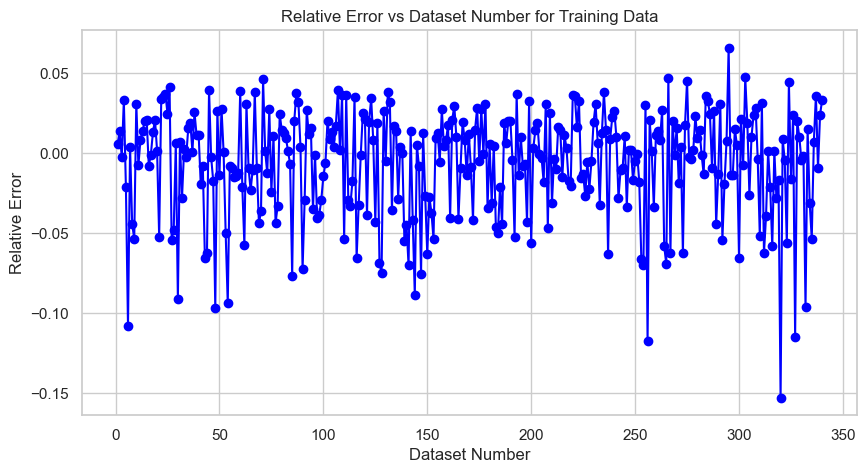

In [38]:
relative_errors_train3 = np.array((y_train3 - y_pred_train3) / y_train3)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_train3) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_train3, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Training Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [39]:
error_df = pd.DataFrame({
    "Relative_Error_Train3" : relative_errors_train3
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Train3
0                 0.005510
1                 0.013764
2                -0.002530
3                 0.032774
4                -0.021552
5                -0.108181
6                 0.003568
7                -0.044134
8                -0.053696
9                 0.030767
10               -0.007785
11                0.008279
12                0.013443
13                0.019804
14                0.020515
15               -0.007878
16               -0.001081
17                0.013040
18                0.020469
19                0.001269
20               -0.052396
21                0.033997
22                0.035102
23                0.037076
24                0.024564
25                0.041314
26               -0.054128
27               -0.048012
28                0.005954
29               -0.091302
30                0.006700
31               -0.027942
32                0.002333
33               -0.002324
34                0.015512
35                0.018878
3

Text(0, 0.5, 'Relative Error')

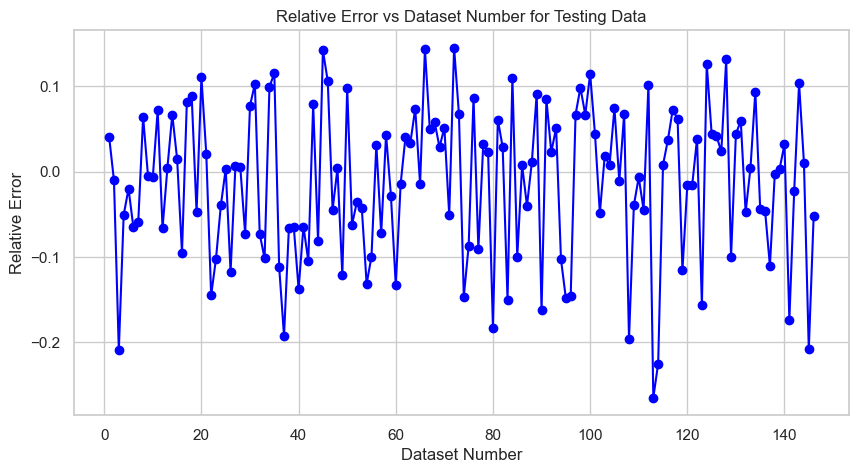

In [40]:
relative_errors_test3 = np.array((y_test3 - y_pred_test3) / y_test3)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_test3) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_test3, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Testing Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [41]:
error_df = pd.DataFrame({
    "Relative_Error_Test3" : relative_errors_test3
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Test3
0                0.041154
1               -0.010237
2               -0.209232
3               -0.050696
4               -0.020057
5               -0.065212
6               -0.058958
7                0.064014
8               -0.004627
9               -0.005917
10               0.072116
11              -0.066175
12               0.004359
13               0.066947
14               0.014648
15              -0.095042
16               0.081599
17               0.088138
18              -0.047398
19               0.110465
20               0.020764
21              -0.144887
22              -0.101994
23              -0.039363
24               0.003114
25              -0.117489
26               0.006952
27               0.005454
28              -0.072999
29               0.077313
30               0.102752
31              -0.073082
32              -0.101689
33               0.099282
34               0.115366
35              -0.111653
36              -0.192555
37          

# 6.) Gaussian Process Regressor

In [42]:
# Split dataset into training and testing sets
x_train4, x_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=0.3, random_state=42)

x_train4 = scaler.fit_transform(x_train4)
x_test4 = scaler.transform(x_test4)

from sklearn.gaussian_process.kernels import ConstantKernel as C, RBF, WhiteKernel

# Define kernel with higher upper bounds
kernel = C(5, (1e-3, 1e6)) * RBF(length_scale=5.0, length_scale_bounds=(1e-3, 1e5)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-3, 1e3))

# Initialize Gaussian Process Regressor with updated kernel
model4 = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=42)

# Train the model
model4.fit(x_train4, y_train4)

# Predict on the test set
y_pred_train4 = model4.predict(x_train4)
y_pred_test4 = model4.predict(x_test4)

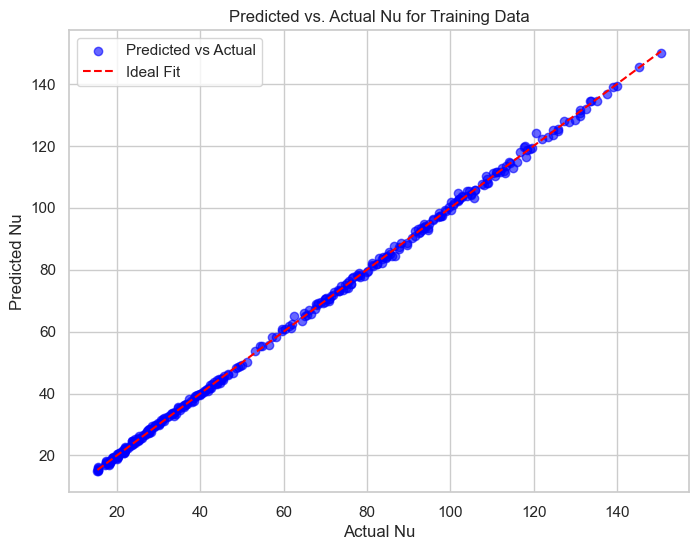

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train4, y_pred_train4, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_train4.min(), y_train4.max()], [y_train4.min(), y_train4.max()], color="red", linestyle="--", label="Ideal Fit")  # Line of perfect prediction
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Training Data")
plt.legend()
plt.show()

In [44]:
comparison_df = pd.DataFrame({
    "Actual_Y_Train4": y_train4,
    "Predicted_Y_Train4": y_pred_train4
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Train4  Predicted_Y_Train4
3          50.101900           49.347725
204       118.178490          116.298382
172        26.606699           26.953217
60        137.544131          136.888251
110        85.253151           85.628520
311        21.661369           20.967806
375        33.663313           32.691783
29         22.031060           21.544059
173        19.970307           18.702324
381        42.597076           41.799403
26         76.072492           75.306566
7         104.006905          103.913693
442        25.140864           25.011201
108       145.353358          145.599081
37        108.590343          110.379626
157        93.746949           93.743322
453        39.316070           39.427234
118        31.193123           31.099180
114       133.541113          134.372633
175        85.632407           85.024406
374        56.422711           55.670140
144       140.123787          139.233124
360       112.315539          112.877077
370        25.26

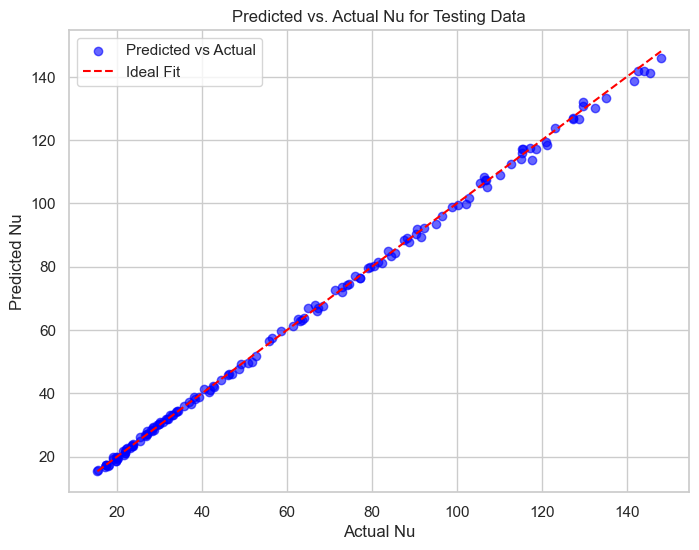

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test4, y_pred_test4, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_test4.min(), y_test4.max()], [y_test4.min(), y_test4.max()], color="red", linestyle="--", label="Ideal Fit")  # Line of perfect prediction
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Testing Data")
plt.legend()
plt.show()

In [46]:
comparison_df = pd.DataFrame({
    "Actual_Y_Test4": y_test4,
    "Predicted_Y_Test4": y_pred_test4
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Test4  Predicted_Y_Test4
420      105.534450         106.481989
262       27.064720          28.119924
431       15.478502          15.613352
448       22.331492          22.563044
364       27.127369          27.191857
465       31.876347          31.864502
193       83.719970          84.967593
225       42.585168          42.330896
104       73.005740          73.436755
229       90.682188          92.035418
9         46.029486          45.751490
176       64.031275          63.803354
480       92.188044          92.178599
325       91.660257          89.344229
391       80.398271          80.348141
429       33.076495          33.219724
84       127.274372         127.010428
30       121.059337         119.534348
333       35.776031          36.131498
90       145.516574         141.073803
249       38.430523          38.052585
305       18.060968          17.207005
101       22.165827          22.494991
481       72.917804          71.927909
33        41.762716      

In [47]:
mae_train4 = mean_absolute_error(y_train4, y_pred_train4)
rmse_train4 = np.sqrt(mean_squared_error(y_train4,y_pred_train4))
r2_train4 = r2_score(y_train4,y_pred_train4)
rae_train4 = relative_absolute_error(y_train4,y_pred_train4)
rrse_train4 = root_relative_squared_error(y_train4,y_pred_train4)
cc_train4 = pearsonr(y_train4,y_pred_train4)
print("For Training Data\n")
print(f'Mean Absolute Error (MAE): {mae_train4:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_train4:.4f}')
print(f'Relative Absolute Error (RAE): {rae_train4}')
print(f'RRSE : {rrse_train4}')
print(f'R2 Score: {r2_train4:.4f}')
print("CC", cc_train4)

print("\n")
scores = cross_val_score(model4, x_train4, y_train4, scoring="neg_mean_squared_error", cv=5)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Training Data

Mean Absolute Error (MAE): 0.5807
Root Mean Square Error (RMSE): 0.7571
Relative Absolute Error (RAE): 0.01797314605145882
RRSE : 0.0208454796405713
R2 Score: 0.9996
CC PearsonRResult(statistic=0.9997827136965565, pvalue=0.0)


Scores:  [0.90639564 0.95581617 0.98409395 0.87081261 1.04335179]
Mean:  0.9520940306870378
Standard deviation:  0.06010131147637511


In [48]:
mae_test4 = mean_absolute_error(y_test4, y_pred_test4)
rmse_test4 = np.sqrt(mean_squared_error(y_test4,y_pred_test4))
r2_test4 = r2_score(y_test4,y_pred_test4)
rae_test4 = relative_absolute_error(y_test4,y_pred_test4)
rrse_test4 = root_relative_squared_error(y_test4,y_pred_test4)
cc_test4 = pearsonr(y_test4,y_pred_test4)
print("For Testing Data\n")
print(f'Mean Absolute Error (MAE): {mae_test4:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_test4:.4f}')
print(f'Relative Absolute Error (RAE): {rae_test4}')
print(f'RRSE : {rrse_test4}')
print(f'R2 Score: {r2_test4:.4f}')
print("CC", cc_test4)
print("\n")
scores = cross_val_score(model4, x_test4, y_test4, scoring="neg_mean_squared_error", cv=5)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Testing Data

Mean Absolute Error (MAE): 0.8029
Root Mean Square Error (RMSE): 1.1017
Relative Absolute Error (RAE): 0.023841865726243448
RRSE : 0.02860347588686149
R2 Score: 0.9992
CC PearsonRResult(statistic=0.999639462771901, pvalue=3.9002274571729323e-228)


Scores:  [0.9258131  1.0586599  1.14507524 1.38796296 1.31196664]
Mean:  1.1658955682818903
Standard deviation:  0.16746536814700694


Text(0, 0.5, 'Relative Error')

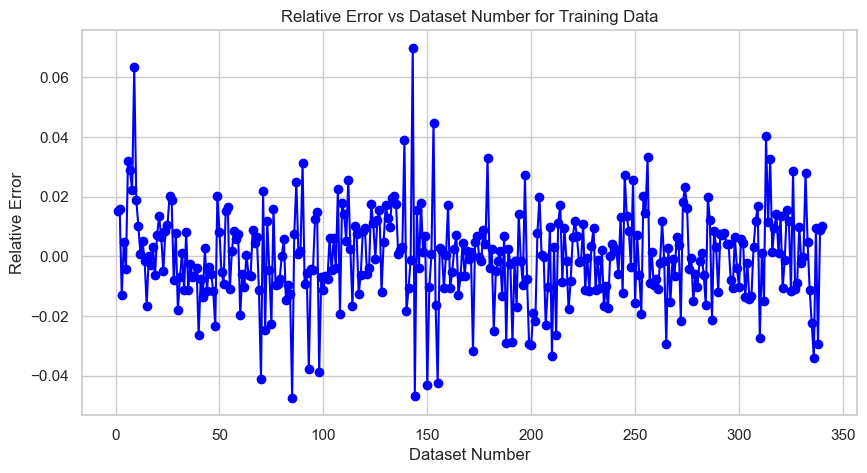

In [49]:
relative_errors_train4 = np.array((y_train4 - y_pred_train4) / y_train4)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_train4) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_train4, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Training Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [50]:
error_df = pd.DataFrame({
    "Relative_Error_Train4" : relative_errors_train4
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Train4
0                 0.015053
1                 0.015909
2                -0.013024
3                 0.004769
4                -0.004403
5                 0.032018
6                 0.028860
7                 0.022105
8                 0.063493
9                 0.018726
10                0.010068
11                0.000896
12                0.005157
13               -0.001691
14               -0.016477
15                0.000039
16               -0.002827
17                0.003012
18               -0.006227
19                0.007100
20                0.013338
21                0.006356
22               -0.005000
23                0.008414
24                0.010373
25                0.020059
26                0.018903
27               -0.007934
28                0.007723
29               -0.017923
30               -0.007079
31                0.001158
32               -0.011140
33                0.008236
34               -0.011153
35               -0.002573
3

Text(0, 0.5, 'Relative Error')

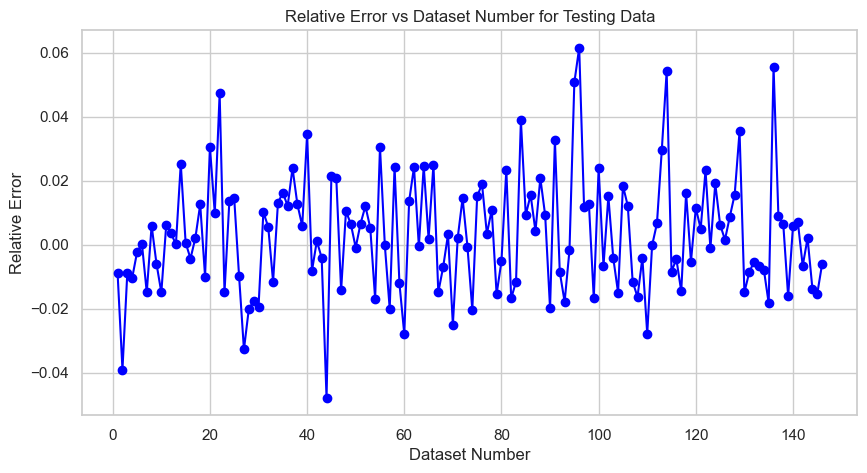

In [51]:
relative_errors_test4 = np.array((y_test4 - y_pred_test4) / y_test4)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_test4) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_test4, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Testing Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [52]:
error_df = pd.DataFrame({
    "Relative_Error_Test4" : relative_errors_test4
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Test4
0               -0.008978
1               -0.038988
2               -0.008712
3               -0.010369
4               -0.002377
5                0.000372
6               -0.014902
7                0.005971
8               -0.005904
9               -0.014923
10               0.006040
11               0.003560
12               0.000102
13               0.025268
14               0.000624
15              -0.004330
16               0.002074
17               0.012597
18              -0.009936
19               0.030531
20               0.009834
21               0.047282
22              -0.014850
23               0.013575
24               0.014462
25              -0.009797
26              -0.032730
27              -0.020139
28              -0.017603
29              -0.019514
30               0.010162
31               0.005585
32              -0.011563
33               0.013084
34               0.016266
35               0.012101
36               0.023943
37          

# 7.) Support Vector Regression

In [53]:
# Support Vector Machines - Support Vector Regression
x_train5, x_test5, y_train5, y_test5 = train_test_split(X, Y, test_size=0.3, random_state=42)

x_train5 = scaler.fit_transform(x_train5)
x_test5 = scaler.transform(x_test5)

model5 = SVR(kernel="linear")

model5.fit(x_train5,y_train5)

y_pred_train5 = model5.predict(x_train5)

y_pred_test5 = model5.predict(x_test5)

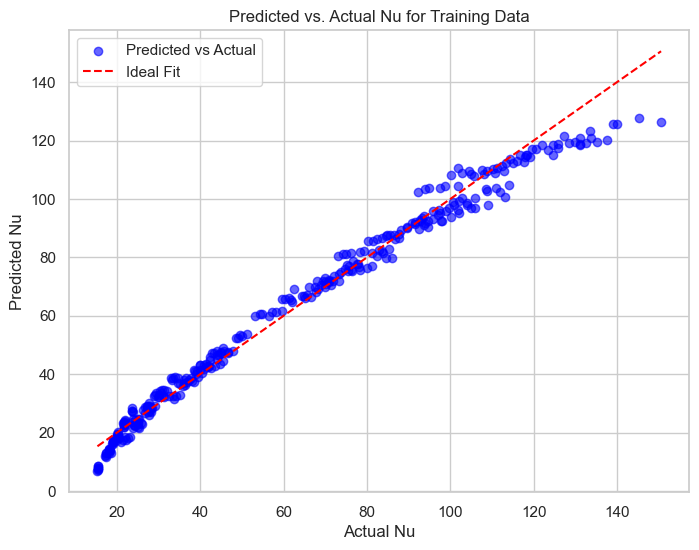

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train5, y_pred_train5, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_train5.min(), y_train5.max()], [y_train5.min(), y_train5.max()], color="red", linestyle="--", label="Ideal Fit")  # Line of perfect prediction
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Training Data")
plt.legend()
plt.show()

In [55]:
comparison_df = pd.DataFrame({
    "Actual_Y_Train5": y_train5,
    "Predicted_Y_Train5": y_pred_train5
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Train5  Predicted_Y_Train5
3          50.101900           52.954014
204       118.178490          115.133017
172        26.606699           28.853663
60        137.544131          120.212802
110        85.253151           82.732718
311        21.661369           21.802797
375        33.663313           31.431407
29         22.031060           23.173112
173        19.970307           18.823205
381        42.597076           42.106421
26         76.072492           75.770752
7         104.006905           98.659397
442        25.140864           23.048412
108       145.353358          127.785954
37        108.590343          103.355998
157        93.746949           94.255572
453        39.316070           41.228025
118        31.193123           34.647076
114       133.541113          123.219999
175        85.632407           87.689404
374        56.422711           59.984619
144       140.123787          125.762474
360       112.315539          111.429808
370        25.26

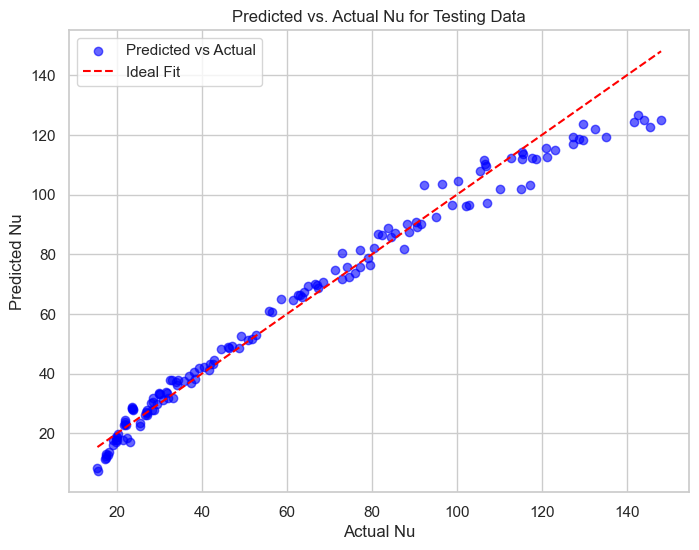

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test5, y_pred_test5, alpha=0.6, color='blue',label="Predicted vs Actual")
plt.plot([y_test5.min(), y_test5.max()], [y_test5.min(), y_test5.max()], color="red", linestyle="--", label="Ideal Fit")  # Line of perfect prediction
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Testing Data")
plt.legend()
plt.show()

In [57]:
comparison_df = pd.DataFrame({
    "Actual_Y_Test5": y_test5,
    "Predicted_Y_Test5": y_pred_test5
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Test5  Predicted_Y_Test5
420      105.534450         108.104171
262       27.064720          27.649629
431       15.478502           7.264110
448       22.331492          18.267855
364       27.127369          26.036977
465       31.876347          31.867122
193       83.719970          88.917162
225       42.585168          43.273206
104       73.005740          71.604758
229       90.682188          89.290879
9         46.029486          48.916063
176       64.031275          67.233444
480       92.188044         103.107311
325       91.660257          90.253985
391       80.398271          82.173000
429       33.076495          31.957094
84       127.274372         117.111642
30       121.059337         115.544499
333       35.776031          37.548704
90       145.516574         122.702474
249       38.430523          38.180493
305       18.060968          13.654305
101       22.165827          22.616887
481       72.917804          80.582601
33        41.762716      

In [58]:
mae_train5 = mean_absolute_error(y_train5, y_pred_train5)
rmse_train5 = np.sqrt(mean_squared_error(y_train5,y_pred_train5))
r2_train5 = r2_score(y_train5,y_pred_train5)
rae_train5 = relative_absolute_error(y_train5,y_pred_train5)
rrse_train5 = root_relative_squared_error(y_train5,y_pred_train5)
cc_train5 = pearsonr(y_train5,y_pred_train5)
print("For Training Data\n")
print(f'Mean Absolute Error (MAE): {mae_train5:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_train5:.4f}')
print(f'Relative Absolute Error (RAE): {rae_train5}')
print(f'RRSE : {rrse_train5}')
print(f'R2 Score: {r2_train5:.4f}')
print("CC",cc_train5)

print("\n")
scores = cross_val_score(model5, x_train5, y_train5, scoring="neg_mean_squared_error", cv=5)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Training Data

Mean Absolute Error (MAE): 3.3462
Root Mean Square Error (RMSE): 4.6631
Relative Absolute Error (RAE): 0.10355925213101941
RRSE : 0.12838688571732682
R2 Score: 0.9835
CC PearsonRResult(statistic=0.992370492339456, pvalue=2.37642864967348e-309)


Scores:  [5.73627894 4.12329385 3.53781077 4.58699046 5.49923254]
Mean:  4.696721312571345
Standard deviation:  0.8256679594712488


In [59]:
mae_test5 = mean_absolute_error(y_test5, y_pred_test5)
rmse_test5 = np.sqrt(mean_squared_error(y_test5,y_pred_test5))
r2_test5 = r2_score(y_test5,y_pred_test5)
rae_test5 = relative_absolute_error(y_test5,y_pred_test5)
rrse_test5 = root_relative_squared_error(y_test5,y_pred_test5)
cc_test5 = pearsonr(y_test5,y_pred_test5)
print("For Testing Data\n")
print(f'Mean Absolute Error (MAE): {mae_test5:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_test5:.4f}')
print(f'Relative Absolute Error (RAE): {rae_test5}')
print(f'RRSE : {rrse_test5}')
print(f'R2 Score: {r2_test5:.4f}')
print("CC", cc_test5)
print("\n")
scores = cross_val_score(model5, x_test5, y_test5, scoring="neg_mean_squared_error", cv=5)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Testing Data

Mean Absolute Error (MAE): 4.1114
Root Mean Square Error (RMSE): 5.8757
Relative Absolute Error (RAE): 0.12209221544038695
RRSE : 0.15255226807753478
R2 Score: 0.9767
CC PearsonRResult(statistic=0.9902899225185183, pvalue=2.6803697953988787e-125)


Scores:  [6.43340069 8.28055282 6.38358511 8.15068868 5.22770096]
Mean:  6.89518565223825
Standard deviation:  1.1619824185704548


Text(0, 0.5, 'Relative Error')

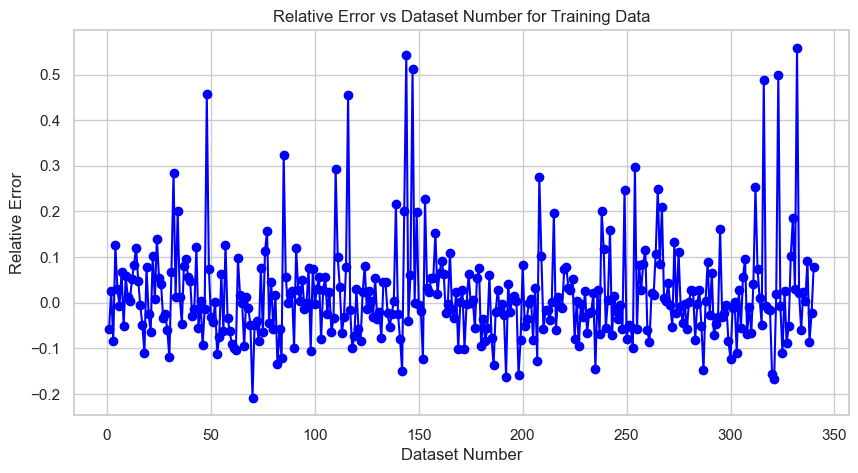

In [60]:
relative_errors_train5 = np.array((y_train5 - y_pred_train5) / y_train5)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_train5) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_train5, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Training Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [61]:
error_df = pd.DataFrame({
    "Relative_Error_Train5" : relative_errors_train5
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Train5
0                -0.056926
1                 0.025770
2                -0.084451
3                 0.126006
4                 0.029564
5                -0.006529
6                 0.066301
7                -0.051838
8                 0.057440
9                 0.011519
10                0.003966
11                0.051415
12                0.083229
13                0.120860
14                0.048203
15               -0.005425
16               -0.048630
17               -0.110728
18                0.077288
19               -0.024021
20               -0.063129
21                0.102490
22                0.007886
23                0.140618
24                0.054845
25                0.041389
26               -0.033105
27               -0.023864
28               -0.060498
29               -0.119342
30                0.068293
31                0.285224
32                0.012370
33                0.200783
34                0.012841
35               -0.046593
3

Text(0, 0.5, 'Relative Error')

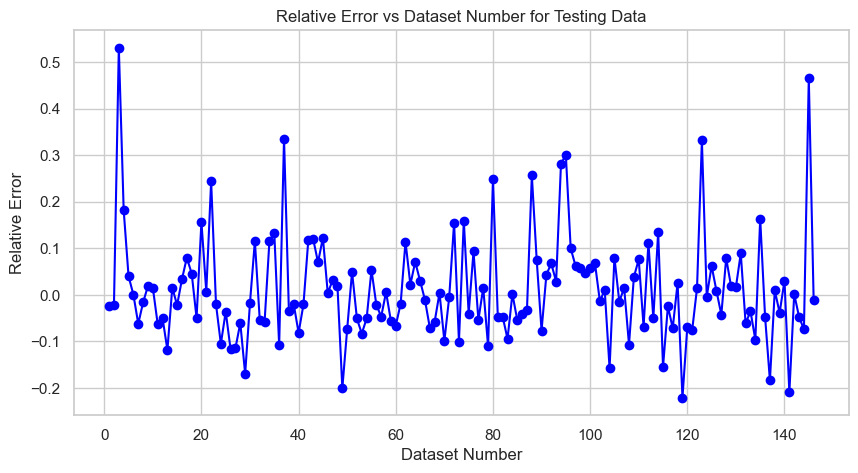

In [62]:
relative_errors_test5 = np.array((y_test5 - y_pred_test5) / y_test5)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_test5) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_test5, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Testing Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [63]:
error_df = pd.DataFrame({
    "Relative_Error_Test5" : relative_errors_test5
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Test5
0               -0.024350
1               -0.021611
2                0.530697
3                0.181969
4                0.040195
5                0.000289
6               -0.062078
7               -0.016157
8                0.019190
9                0.015343
10              -0.062711
11              -0.050009
12              -0.118446
13               0.015342
14              -0.022074
15               0.033843
16               0.079849
17               0.045555
18              -0.049549
19               0.156780
20               0.006506
21               0.243988
22              -0.020349
23              -0.105116
24              -0.036040
25              -0.116887
26              -0.114622
27              -0.060311
28              -0.169806
29              -0.016485
30               0.115602
31              -0.053010
32              -0.057947
33               0.116352
34               0.132474
35              -0.108488
36               0.335735
37          

# 8.) K-Nearest Neighbour Regressor

In [64]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X, Y, test_size=0.3, random_state=42)

x_train6 = scaler.fit_transform(x_train6)
x_test6 = scaler.transform(x_test6)

model6 = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')

model6.fit(x_train6, y_train6)

y_pred_train6 = model6.predict(x_train6)
y_pred_test6 = model6.predict(x_test6)


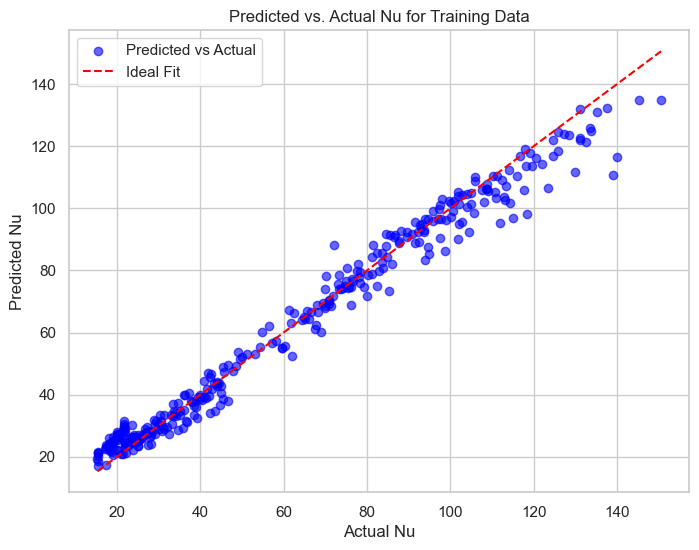

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train6, y_pred_train6, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_train6), max(y_train6)], [min(y_train6), max(y_train6)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Training Data")
plt.legend()
plt.show()

In [66]:
comparison_df = pd.DataFrame({
    "Actual_Y_Train6": y_train6,
    "Predicted_Y_Train6": y_pred_train6
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Train6  Predicted_Y_Train6
3          50.101900           52.050685
204       118.178490          113.659195
172        26.606699           28.863739
60        137.544131          132.384828
110        85.253151           73.460479
311        21.661369           26.187430
375        33.663313           34.572036
29         22.031060           28.872750
173        19.970307           27.431725
381        42.597076           46.669035
26         76.072492           68.888756
7         104.006905          100.466167
442        25.140864           26.280001
108       145.353358          134.911833
37        108.590343          106.131109
157        93.746949           92.283196
453        39.316070           32.459195
118        31.193123           28.892207
114       133.541113          125.960036
175        85.632407           91.271644
374        56.422711           61.944246
144       140.123787          116.656962
360       112.315539          109.139661
370        25.26

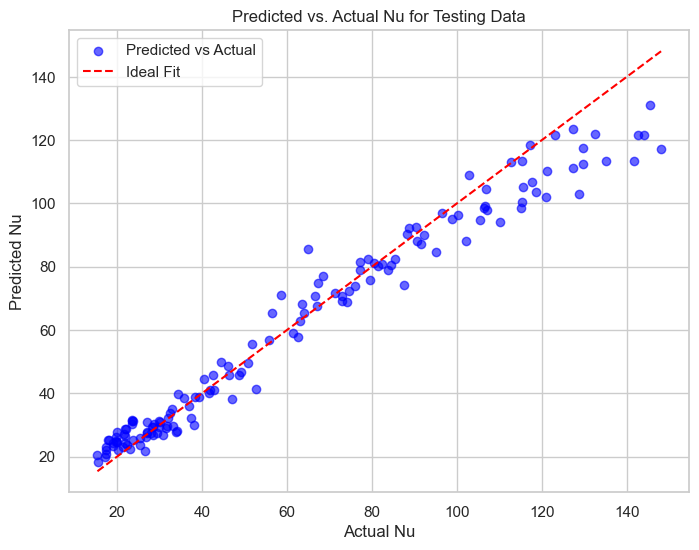

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test6, y_pred_test6, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test6), max(y_test6)], [min(y_test6), max(y_test6)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs. Actual Nu for Testing Data")
plt.legend()
plt.show()

In [68]:
comparison_df = pd.DataFrame({
    "Actual_Y_Test6": y_test6,
    "Predicted_Y_Test6": y_pred_test6
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)

     Actual_Y_Test6  Predicted_Y_Test6
420      105.534450          94.702167
262       27.064720          31.059398
431       15.478502          18.218261
448       22.331492          23.756681
364       27.127369          27.527040
465       31.876347          32.107112
193       83.719970          78.928248
225       42.585168          45.762276
104       73.005740          70.899402
229       90.682188          88.185127
9         46.029486          48.631017
176       64.031275          65.276568
480       92.188044          90.162253
325       91.660257          87.026922
391       80.398271          81.325803
429       33.076495          29.804338
84       127.274372         111.099702
30       121.059337         101.939818
333       35.776031          38.581617
90       145.516574         131.188772
249       38.430523          38.714242
305       18.060968          25.110357
101       22.165827          28.749943
481       72.917804          69.125976
33        41.762716      

In [69]:
mae_train6 = mean_absolute_error(y_train6, y_pred_train6)
rmse_train6 = np.sqrt(mean_squared_error(y_train6,y_pred_train6))
r2_train6 = r2_score(y_train6,y_pred_train6)
rae_train6 = relative_absolute_error(y_train6,y_pred_train6)
rrse_train6 = root_relative_squared_error(y_train6,y_pred_train6)
cc_train6 = pearsonr(y_train6,y_pred_train6)
print("For Training Data\n")
print(f'Mean Absolute Error (MAE): {mae_train6:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_train6:.4f}')
print(f'Relative Absolute Error (RAE): {rae_train6}')
print(f'RRSE : {rrse_train6}')
print(f'R2 Score: {r2_train6:.4f}')
print("CC",cc_train6)

print("\n")
scores = cross_val_score(model6, x_train6, y_train6, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Training Data

Mean Absolute Error (MAE): 3.8523
Root Mean Square Error (RMSE): 5.4653
Relative Absolute Error (RAE): 0.11922115191089608
RRSE : 0.15047342651472492
R2 Score: 0.9774
CC PearsonRResult(statistic=0.9907715832474744, pvalue=1.9154985006205093e-295)


Scores:  [10.86466854  7.45234696  6.50768465  9.22669078  6.40330935  7.26408892
 10.6301077   6.27036786  7.93901631  6.6717677 ]
Mean:  7.923004877713669
Standard deviation:  1.6415463024583785


In [70]:
mae_test6 = mean_absolute_error(y_test6, y_pred_test6)
rmse_test6 = np.sqrt(mean_squared_error(y_test6,y_pred_test6))
r2_test6 = r2_score(y_test6,y_pred_test6)
rae_test6 = relative_absolute_error(y_test6,y_pred_test6)
rrse_test6 = root_relative_squared_error(y_test6,y_pred_test6)
cc_test6 = pearsonr(y_test6,y_pred_test6)
print("For Testing Data\n")
print(f'Mean Absolute Error (MAE): {mae_test6:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse_test6:.4f}')
print(f'Relative Absolute Error (RAE): {rae_test6}')
print(f'RRSE : {rrse_test6}')
print(f'R2 Score: {r2_test6:.4f}')
print("CC", cc_test6)
print("\n")
scores = cross_val_score(model6, x_test6, y_test6, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(model_scores)

For Testing Data

Mean Absolute Error (MAE): 5.7398
Root Mean Square Error (RMSE): 8.2781
Relative Absolute Error (RAE): 0.17044709635293956
RRSE : 0.2149255497194255
R2 Score: 0.9538
CC PearsonRResult(statistic=0.9849983620474903, pvalue=8.895984953756148e-112)


Scores:  [11.09410299 11.1568193  13.26408019  8.65146941 11.52532412  7.5764271
 11.05046562  8.40819797 11.28103982 11.25138204]
Mean:  10.52593085483261
Standard deviation:  1.6518675750544625


Text(0, 0.5, 'Relative Error')

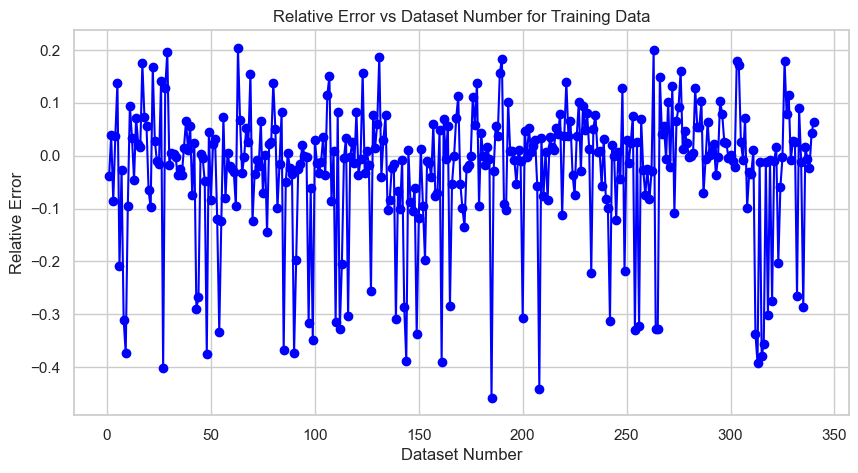

In [71]:
relative_errors_train6 = np.array((y_train6 - y_pred_train6) / y_train6)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_train6) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_train6, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Training Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [72]:
error_df = pd.DataFrame({
    "Relative_Error_Train6" : relative_errors_train6
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Train6
0                -0.038896
1                 0.038241
2                -0.084830
3                 0.037510
4                 0.138325
5                -0.208946
6                -0.026994
7                -0.310547
8                -0.373626
9                -0.095592
10                0.094433
11                0.034043
12               -0.045310
13                0.071835
14                0.022647
15                0.015614
16                0.174404
17                0.073764
18                0.056770
19               -0.065854
20               -0.097860
21                0.167472
22                0.028276
23               -0.009768
24               -0.015401
25                0.141785
26               -0.402488
27                0.128676
28                0.195223
29               -0.017046
30                0.005897
31                0.003572
32               -0.002432
33               -0.037312
34               -0.025379
35               -0.036566
3

Text(0, 0.5, 'Relative Error')

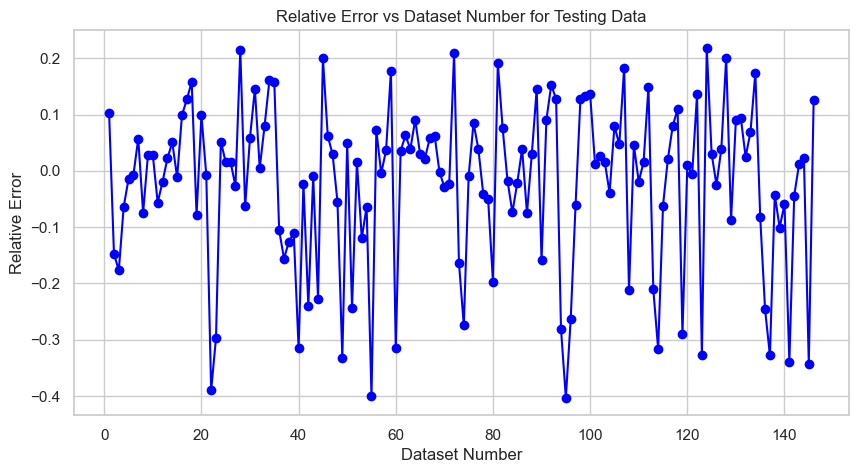

In [73]:
relative_errors_test6 = np.array((y_test6 - y_pred_test6) / y_test6)

# Prepare dataset numbers for plotting
dataset_numbers = np.arange(1, len(relative_errors_test6) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dataset_numbers, relative_errors_test6, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Relative Error vs Dataset Number for Testing Data')
plt.xlabel('Dataset Number')
plt.ylabel('Relative Error')

In [74]:
error_df = pd.DataFrame({
    "Relative_Error_Test6" : relative_errors_test6
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(error_df)

     Relative_Error_Test6
0                0.102642
1               -0.147597
2               -0.177004
3               -0.063820
4               -0.014733
5               -0.007239
6                0.057235
7               -0.074606
8                0.028852
9                0.027536
10              -0.056519
11              -0.019448
12               0.021975
13               0.050549
14              -0.011537
15               0.098927
16               0.127085
17               0.157935
18              -0.078421
19               0.098462
20              -0.007383
21              -0.390311
22              -0.297039
23               0.052001
24               0.015018
25               0.015376
26              -0.026994
27               0.214217
28              -0.063002
29               0.059161
30               0.145391
31               0.005139
32               0.080005
33               0.161357
34               0.157242
35              -0.105743
36              -0.155991
37          

# 9.) Final Output

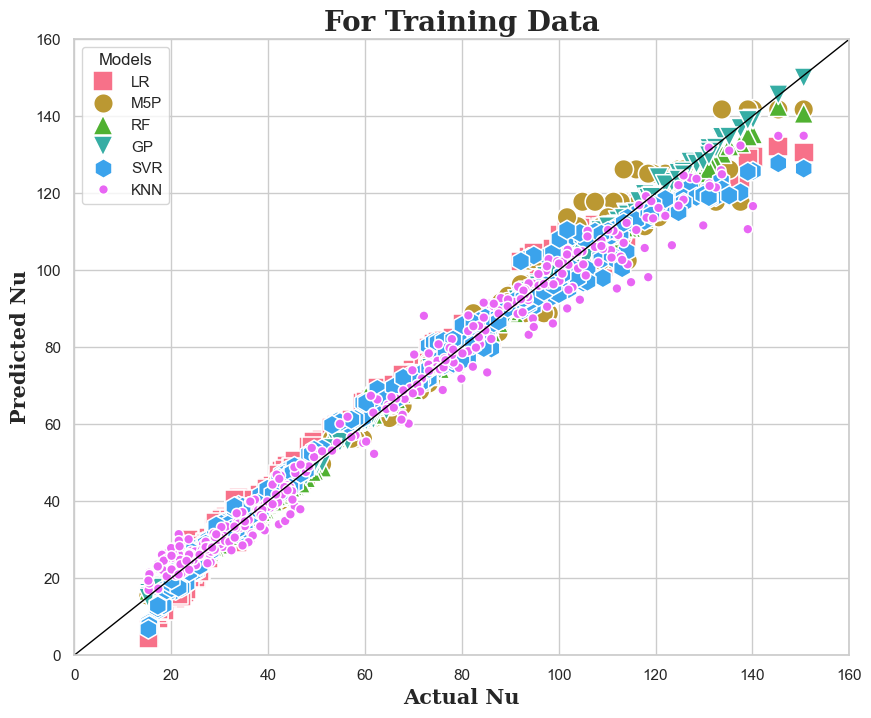

In [75]:
a = len(y_train1)
train = pd.DataFrame({
    "Actual Nu": np.concatenate([y_train1, y_train2, y_train3, y_train4, y_train5, y_train6]),
    "Predicted Nu": np.concatenate([y_pred_train1,y_pred_train2,y_pred_train3,y_pred_train4,y_pred_train5, y_pred_train6]),
    "Model" : ['LR']*a + ['M5P']*a + ['RF']*a + ['GP']*a + ['SVR']*a + ['KNN']*a
})

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
palette = sns.color_palette("husl",6)

sns.scatterplot(data=train, x="Actual Nu", y="Predicted Nu", hue="Model", style="Model", s=200,
                palette=palette,
                markers={'LR':'s', 'M5P':'o','RF':'^','GP':'v','SVR':'h','KNN':'.'}
                )

plt.plot([0,160],[0,160],color='black',linestyle='-',linewidth=1)

plt.xlim([0,160])
plt.ylim([0,160])

plt.xlabel("Actual Nu",fontsize=15, fontweight='bold',fontname='serif')
plt.ylabel("Predicted Nu",fontsize=15, fontweight='bold',fontname='serif')
plt.title("For Training Data",fontsize=20, fontweight='bold',fontname='serif')
plt.legend(title="Models")

plt.show()

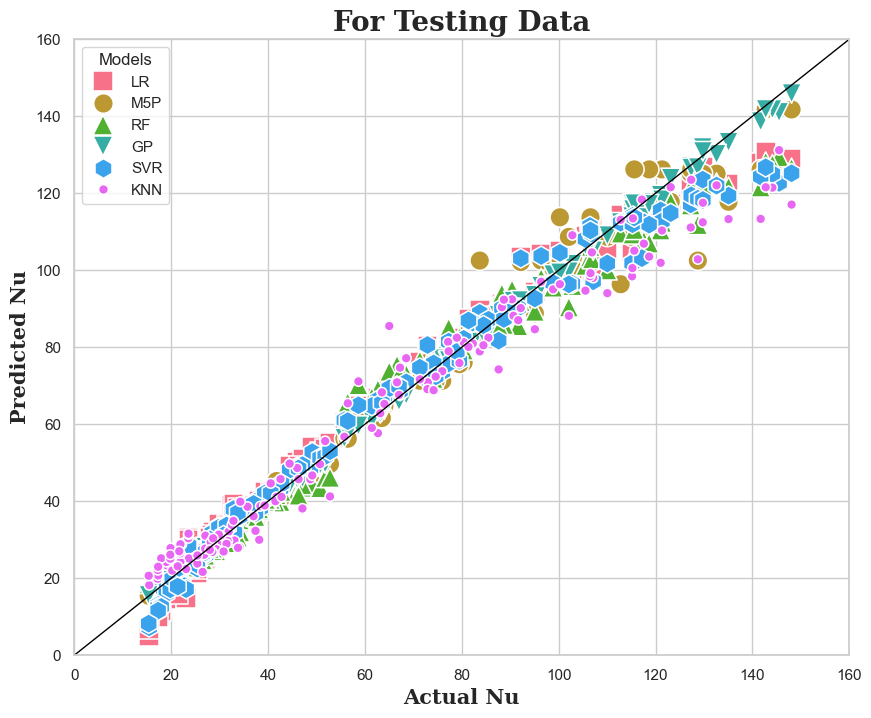

In [76]:
a = len(y_test1)
test = pd.DataFrame({
    "Actual Nu": np.concatenate([y_test1, y_test2, y_test3, y_test4, y_test5, y_test6]),
    "Predicted Nu": np.concatenate([y_pred_test1,y_pred_test2,y_pred_test3,y_pred_test4,y_pred_test5,y_pred_test6]),
    "Model" : ['LR']*a + ['M5P']*a + ['RF']*a + ['GP']*a + ['SVR']*a + ['KNN']*a
})

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
palette = sns.color_palette("husl",6)

sns.scatterplot(data=test, x="Actual Nu", y="Predicted Nu", hue="Model", style="Model", s=200,
                palette=palette,
                markers={'LR':'s', 'M5P':'o','RF':'^','GP':'v','SVR':'h','KNN':'.'}
                )

plt.plot([0,160],[0,160],color='black',linestyle='-',linewidth=1)

plt.xlim([0,160])
plt.ylim([0,160])

plt.xlabel("Actual Nu",fontsize=15, fontweight='bold',fontname='serif')
plt.ylabel("Predicted Nu",fontsize=15, fontweight='bold',fontname='serif')
plt.title("For Testing Data",fontsize=20, fontweight='bold',fontname='serif')
plt.legend(title="Models")

plt.show()

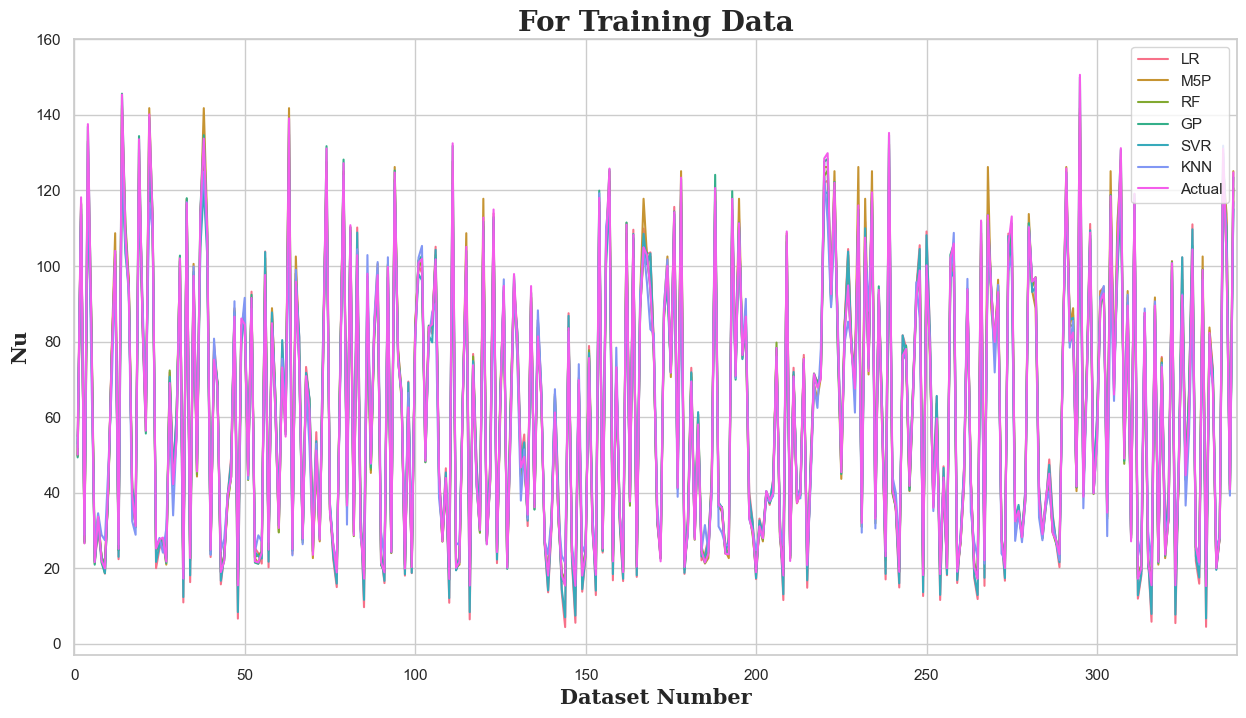

In [77]:
l = len(y_train1)
a = np.arange(1,len(y_train1)+1)

train = pd.DataFrame({
    "Dataset Number": np.concatenate([a]*7),
    "Nu": np.concatenate([y_pred_train1,y_pred_train2,y_pred_train3,y_pred_train4,y_pred_train5,y_pred_train6,y_train1]),
    "Model" : ['LR']*l + ['M5P']*l + ['RF']*l + ['GP']*l + ['SVR']*l + ['KNN']*l + ['Actual']*l
})

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
palette = sns.color_palette("husl",7)

sns.lineplot(data=train, x="Dataset Number", y="Nu", hue="Model",
                palette=palette,
                linewidth = 1.5
                )

plt.xlim([0,341])
plt.ylim([-3,160])
plt.xlabel("Dataset Number",fontsize=15, fontweight='bold',fontname='serif')
plt.ylabel("Nu",fontsize=15, fontweight='bold',fontname='serif')
plt.title("For Training Data",fontsize=20, fontweight='bold',fontname='serif')
plt.legend(loc="upper right")

plt.show()

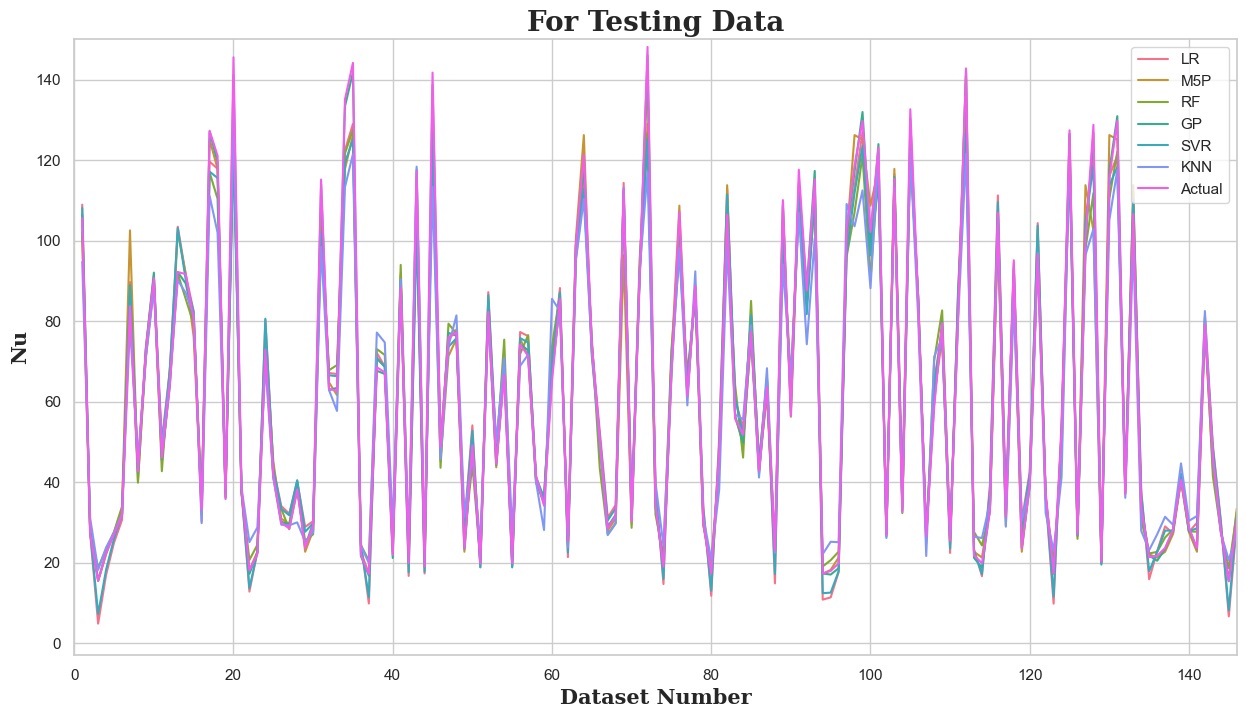

In [78]:
l = len(y_test1)
a = np.arange(1,len(y_test1)+1)

test = pd.DataFrame({
    "Dataset Number": np.concatenate([a]*7),
    "Nu": np.concatenate([y_pred_test1,y_pred_test2,y_pred_test3,y_pred_test4,y_pred_test5,y_pred_test6,y_test1]),
    "Model" : ['LR']*l + ['M5P']*l + ['RF']*l + ['GP']*l + ['SVR']*l + ['KNN']*l + ['Actual']*l
})

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
palette = sns.color_palette("husl",7)

sns.lineplot(data=test, x="Dataset Number", y="Nu", hue="Model",
                palette=palette,
                linewidth = 1.5
                )
plt.xlim([0,146])
plt.ylim([-3,150])
plt.xlabel("Dataset Number",fontsize=15, fontweight='bold',fontname='serif')
plt.ylabel("Nu",fontsize=15, fontweight='bold',fontname='serif')
plt.title("For Testing Data",fontsize=20, fontweight='bold',fontname='serif')
plt.legend(loc = "upper right")

plt.show()

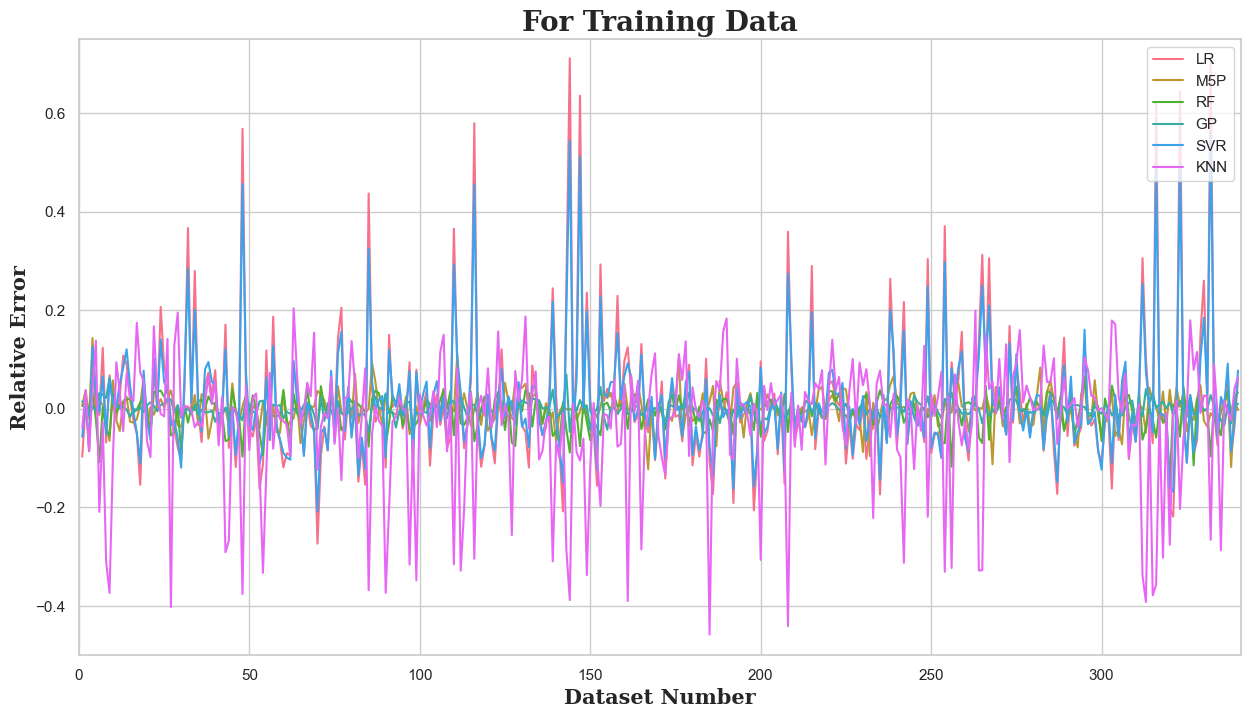

In [79]:
l = len(y_train1)
a = np.arange(1,len(y_train1)+1)

train = pd.DataFrame({
    "Dataset Number": np.concatenate([a]*6),
    "Relative Error": np.concatenate([relative_errors_train1,relative_errors_train2,relative_errors_train3,relative_errors_train4,relative_errors_train5,relative_errors_train6]),
    "Model" : ['LR']*l + ['M5P']*l + ['RF']*l + ['GP']*l + ['SVR']*l + ['KNN']*l
})

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
palette = sns.color_palette("husl",6)

sns.lineplot(data=train, x="Dataset Number", y="Relative Error", hue="Model",
                palette=palette,
                linewidth = 1.5
                )
plt.xlim([0,341])
plt.ylim([-0.5,0.75])
plt.xlabel("Dataset Number",fontsize=15, fontweight='bold',fontname='serif')
plt.ylabel("Relative Error",fontsize=15, fontweight='bold',fontname='serif')
plt.title("For Training Data",fontsize=20, fontweight='bold',fontname='serif')
plt.legend(loc="upper right")

plt.show()

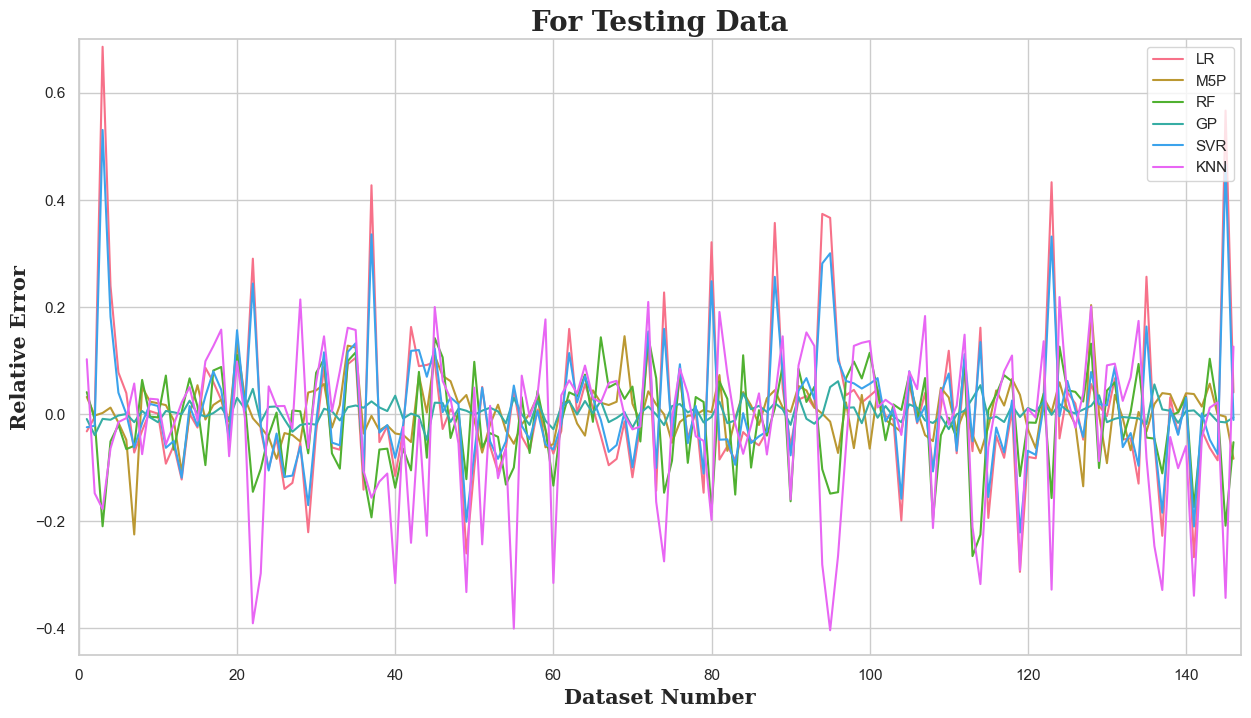

In [80]:
l = len(y_test1)
a = np.arange(1,len(y_test1)+1)

test = pd.DataFrame({
    "Dataset Number": np.concatenate([a]*6),
    "Relative Error": np.concatenate([relative_errors_test1,relative_errors_test2,relative_errors_test3,relative_errors_test4,relative_errors_test5,relative_errors_test6]),
    "Model" : ['LR']*l + ['M5P']*l + ['RF']*l + ['GP']*l + ['SVR']*l + ['KNN']*l
})

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
palette = sns.color_palette("husl",6)

sns.lineplot(data=test, x="Dataset Number", y="Relative Error", hue="Model",
                palette=palette,
                linewidth = 1.5
                )
plt.xlim([0,147])
plt.ylim([-0.45,0.7])
plt.xlabel("Dataset Number",fontsize=15, fontweight='bold',fontname='serif')
plt.ylabel("Relative Error",fontsize=15, fontweight='bold',fontname='serif')
plt.title("For Testing Data",fontsize=20, fontweight='bold',fontname='serif')
plt.legend(loc="upper right")

plt.show()

In [81]:
perform_train = pd.DataFrame({
    "Models" : ["LR", "M5P","RF","GP","SVR","KNN"],
    "CC" : [cc_train1[0], cc_train2[0], cc_train3[0], cc_train4[0], cc_train5[0], cc_train6[0]],
    "R2" : [r2_train1, r2_train2, r2_train3, r2_train4, r2_train5,r2_train6],
    "MAE" : [mae_train1, mae_train2, mae_train3, mae_train4, mae_train5,mae_train6],
    "RMSE" : [rmse_train1, rmse_train2, rmse_train3, rmse_train4, rmse_train5, rmse_train6],
    "RAE" : [rae_train1*100, rae_train2*100, rae_train3*100, rae_train4*100, rae_train5*100, rae_train6*100],
    "RRSE" : [rrse_train1*100, rrse_train2*100, rrse_train3*100, rrse_train4*100, rrse_train5*100, rrse_train6*100]
})

perform_test = pd.DataFrame({
    "Models" : ["LR", "M5P","RF","GP","SVR","KNN"],
    "CC" : [cc_test1[0], cc_test2[0], cc_test3[0], cc_test4[0], cc_test5[0], cc_test6[0]],
    "R2" : [r2_test1, r2_test2, r2_test3, r2_test4, r2_test5, r2_test6],
    "MAE" : [mae_test1, mae_test2, mae_test3, mae_test4, mae_test5, mae_test6],
    "RMSE" : [rmse_test1, rmse_test2, rmse_test3, rmse_test4, rmse_test5, rmse_test6],
    "RAE" : [rae_test1*100, rae_test2*100, rae_test3*100, rae_test4*100, rae_test5*100, rae_test6*100],
    "RRSE" : [rrse_test1*100, rrse_test2*100, rrse_test3*100, rrse_test4*100, rrse_test5*100, rrse_test6*100]
})

In [82]:
print("Training Data")
perform_train

Training Data


Models        CC        R2       MAE      RMSE        RAE       RRSE
0     LR  0.992633  0.985320  3.384545  4.400627  10.474628  12.115930
1    M5P  0.996005  0.992026  1.947147  3.243459   6.026110   8.929982
2     RF  0.998977  0.997367  1.361455  1.863763   4.213488   5.131365
3     GP  0.999783  0.999565  0.580745  0.757129   1.797315   2.084548
4    SVR  0.992370  0.983517  3.346190  4.663140  10.355925  12.838689
5    KNN  0.990772  0.977358  3.852255  5.465346  11.922115  15.047343

In [83]:
print("Testing Data")
perform_test

Testing Data


Models        CC        R2       MAE      RMSE        RAE       RRSE
0     LR  0.990765  0.980732  4.089719  5.346391  12.144751  13.880987
1    M5P  0.991340  0.981815  2.899207  5.193932   8.609429  13.485153
2     RF  0.991947  0.976335  4.244789  5.925099  12.605245  15.383503
3     GP  0.999639  0.999182  0.802870  1.101689   2.384187   2.860348
4    SVR  0.990290  0.976728  4.111429  5.875692  12.209222  15.255227
5    KNN  0.984998  0.953807  5.739769  8.278057  17.044710  21.492555

In [84]:
# Command to print all the Train data together
comparison_df = pd.DataFrame({
    "Actual_Y_Train1": y_train1,
    "Predicted_Y_Train1": y_pred_train1,
    "Relative_Error_Train1" : relative_errors_train1,
    "Actual_Y_Train2": y_train2,
    "Predicted_Y_Train2": y_pred_train2,
    "Relative_Error_Train2" : relative_errors_train2,
    "Actual_Y_Train3": y_train3,
    "Predicted_Y_Train3": y_pred_train3,
    "Relative_Error_Train3" : relative_errors_train3,
    "Actual_Y_Train4": y_train4,
    "Predicted_Y_Train4": y_pred_train4,
    "Relative_Error_Train4" : relative_errors_train4,
    "Actual_Y_Train5": y_train5,
    "Predicted_Y_Train5": y_pred_train5,
    "Relative_Error_Train5" : relative_errors_train5,
    "Actual_Y_Train6": y_train6,
    "Predicted_Y_Train6": y_pred_train6,
    "Relative_Error_Train6" : relative_errors_train6
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)
# Command to save/export all the data in an excel file saved at same location
comparison_df.to_excel('table1.xlsx')

     Actual_Y_Train1  Predicted_Y_Train1  Relative_Error_Train1  \
3          50.101900           54.957782              -0.096920   
204       118.178490          116.836882               0.011352   
172        26.606699           28.904466              -0.086360   
60        137.544131          123.656013               0.100972   
110        85.253151           85.896024              -0.007541   
311        21.661369           21.926107              -0.012222   
375        33.663313           29.486555               0.124074   
29         22.031060           23.532587              -0.068155   
173        19.970307           18.607375               0.068248   
381        42.597076           42.334608               0.006162   
26         76.072492           77.528393              -0.019138   
7         104.006905          101.345692               0.025587   
442        25.140864           22.421542               0.108163   
108       145.353358          132.146879               0.09085

In [85]:
# Command to print all the Test data together
comparison_df = pd.DataFrame({
    "Actual_Y_Test1": y_test1,
    "Predicted_Y_Test1": y_pred_test1,
    "Relative_Error_Test1" : relative_errors_test1,
    "Actual_Y_Test2": y_test2,
    "Predicted_Y_Test2": y_pred_test2,
    "Relative_Error_Test2" : relative_errors_test2,
    "Actual_Y_Test3": y_test3,
    "Predicted_Y_Test3": y_pred_test3,
    "Relative_Error_Test3" : relative_errors_test3,
    "Actual_Y_Test4": y_test4,
    "Predicted_Y_Test4": y_pred_test4,
    "Relative_Error_Test4" : relative_errors_test4,
    "Actual_Y_Test5": y_test5,
    "Predicted_Y_Test5": y_pred_test5,
    "Relative_Error_Test5" : relative_errors_test5,
    "Actual_Y_Test6": y_test6,
    "Predicted_Y_Test6": y_pred_test6,
    "Relative_Error_Test6" : relative_errors_test6
})

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(comparison_df)
# Command to save/export all the data in an excel file saved at same location
comparison_df.to_excel('table2.xlsx')

     Actual_Y_Test1  Predicted_Y_Test1  Relative_Error_Test1  Actual_Y_Test2  \
420      105.534450         108.913861             -0.032022      105.534450   
262       27.064720          27.211959             -0.005440       27.064720   
431       15.478502           4.860812              0.685964       15.478502   
448       22.331492          16.981481              0.239573       22.331492   
364       27.127369          25.013581              0.077921       27.127369   
465       31.876347          30.622026              0.039350       31.876347   
193       83.719970          89.711945             -0.071572       83.719970   
225       42.585168          43.891290             -0.030671       42.585168   
104       73.005740          72.582985              0.005791       73.005740   
229       90.682188          90.599793              0.000909       90.682188   
9         46.029486          50.280066             -0.092345       46.029486   
176       64.031275          67.772044  